# Employee Attrition Prediction using Machine Learning

## Introduction

In today's competitive business landscape, understanding employee retention and attrition is critical for organizations aiming to maintain a stable and motivated workforce. The ability to predict whether an employee is likely to leave or stay with the company can provide valuable insights that aid in human resource planning, decision-making, and strategies to reduce turnover rates.

This project focuses on the analysis and prediction of employee attrition using machine learning models. The dataset contains various features that describe employee characteristics, job roles, job satisfaction, and other important aspects of their work environment.

By the end of this project, we aim to build a robust machine learning model that can accurately predict employee attrition and provide meaningful insights that HR departments can use to reduce employee turnover.

The following notebook walks through the steps involved, from data preprocessing to model building and evaluation.

## First steps

**Importing Libraries**

These libraries are essential for data manipulation, visualization, statistical analysis, and machine learning.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import chi2_contingency
#from scipy.stats.contingency import association
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
import sys
import os
import pickle

# Obtain the current working directory
current_dir = os.getcwd()

# Obtain the root directory of the project 
project_root = os.path.dirname(current_dir)


# Add the project root directory to sys.path
sys.path.append(project_root)

# Import from lib.functions
from lib.functions import *



pd.set_option('display.max_columns', None) # All columns of the dataframe will be displayed

In [2]:
# load data
data = pd.read_csv('../data/raw/hr_test.csv')

**Exploratory Data Function**

`df_exploration` performs an initial exploration of the data, providing key insights such as:
- Data types: Shows the type of each column (e.g., integers, floats, or objects).
- Duplicates: Checks if there are any duplicated rows in the dataframe.
- Missing values: Counts the number of missing values in each column.
- Unique values: Shows how many unique values are in each column.

In [3]:
df_exploration(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,83,Master’s Degree,Married,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,Yes,55,Associate Degree,Single,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,Yes,14,Associate Degree,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,43,Master’s Degree,Single,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,Yes,47,Master’s Degree,Married,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,Yes,40,Associate Degree,Single,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,Yes,45,Master’s Degree,Married,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,No,4,Associate Degree,Married,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,No,13,Bachelor’s Degree,Divorced,3,Mid,Large,5,No,No,No,Poor,High,Stayed


**Standardizing Column Names**

This line standardizes the column names by converting them to lowercase, replacing spaces with underscores (_), and replacing hyphens (-) with underscores.

In [4]:
# Standardize the column names
data.columns = data.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

**Dropping the Employee ID Column**

The employee_id column is likely not useful for our analysis or machine learning model, as it doesn't provide meaningful information for prediction.

In [5]:
# drop the employee id column
data.drop(columns=['employee_id'], inplace=True)

**Statistical Summary (Descriptive Statistics)**


In [6]:
# describe the data
data.describe()

,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,company_tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


**Function to Get Value Counts for Multiple Columns**

`get_value_counts` iterates over each column in a list and gets the count of unique values for each column using `value_counts()`.

In [7]:
# Columns list to count the values
columns_to_count = [
    'gender', 'job_role', 'work_life_balance', 'job_satisfaction', 'performance_rating',
    'education_level', 'marital_status', 'job_level', 'company_size', 'remote_work',
    'leadership_opportunities', 'innovation_opportunities', 'company_reputation', 
    'employee_recognition', 'attrition'
]

# Call the function
value_counts = get_value_counts(data, columns_to_count)

# Show the counts
for column, counts in value_counts.items():
    print(counts)


gender:
gender
Male      8087
Female    6813


job_role:
job_role
Technology    3815
Healthcare    3432
Education     3168
Media         2422
Finance       2063


work_life_balance:
work_life_balance
Good         5630
Fair         4483
Excellent    2713
Poor         2074


job_satisfaction:
job_satisfaction
High         7466
Very High    2968
Medium       2900
Low          1566


performance_rating:
performance_rating
Average          8909
High             3022
Below Average    2189
Low               780


education_level:
education_level
Bachelor’s Degree    4505
Associate Degree     3734
Master’s Degree      3001
High School          2932
PhD                   728


marital_status:
marital_status
Married     7511
Single      5166
Divorced    2223


job_level:
job_level
Mid       5925
Entry     5913
Senior    3062


company_size:
company_size
Medium    7486
Small     4420
Large     2994


remote_work:
remote_work
No     12061
Yes     2839


leadership_opportunities:
leadership_opport

## Classifying Columns into Categorical and Numerical

To segregate the dataframe into categorical and numerical subsets for tailored analysis

In [8]:
# Displaying All Column Names
data.columns

Index(['age', 'gender', 'years_at_company', 'job_role', 'monthly_income',
       'work_life_balance', 'job_satisfaction', 'performance_rating',
       'number_of_promotions', 'overtime', 'distance_from_home',
       'education_level', 'marital_status', 'number_of_dependents',
       'job_level', 'company_size', 'company_tenure', 'remote_work',
       'leadership_opportunities', 'innovation_opportunities',
       'company_reputation', 'employee_recognition', 'attrition'],
      dtype='object')

In [9]:
# Selecting the categorical and numerical columns
data_categorical = data[['gender', 'job_role', 'work_life_balance', 'job_satisfaction',
                         'performance_rating', 'overtime', 'education_level', 'marital_status', 'job_level',
                         'company_size', 'remote_work', 'leadership_opportunities', 'innovation_opportunities',
                         'company_reputation', 'employee_recognition', 'attrition']]
data_numerical = data[['age', 'years_at_company','monthly_income', 'number_of_promotions',
                       'distance_from_home', 'number_of_dependents', 'company_tenure']]

## EDA categorical columns

Univariate and bivariate exploratory data analysis (EDA) on **categorical columns**.

``eda_uni_cat`` provides univariate analysis of categorical columns. It calculates the relative frequency (percentage) of each category and generates a countplot to visually show the count of each category in the column.

``eda_bi_cat`` performs bivariate analysis to analyze the relationship between two categorical columns — one feature column (``cat_col``) and the target column (``attrition``).
- The **chi-squared test** evaluates whether there is a statistically significant association between the categorical feature and the target variable (attrition).
- **Cramér’s V** Measures the strength of the association between the two categorical variables.
- **A barplot** to visually represent the percentages of attrition for each category

        Frecuencia relativa (%)
gender                         
Male                  54.275168
Female                45.724832


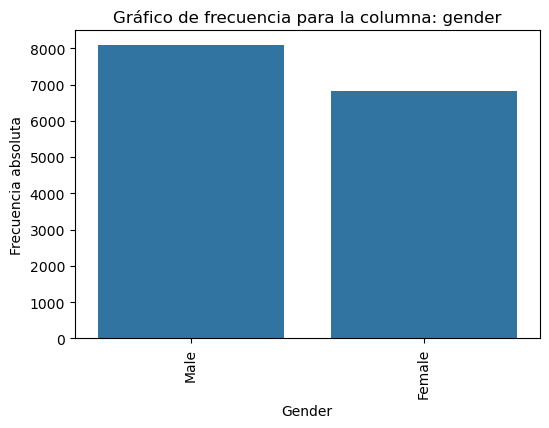

            Frecuencia relativa (%)
job_role                           
Technology                25.604027
Healthcare                23.033557
Education                 21.261745
Media                     16.255034
Finance                   13.845638


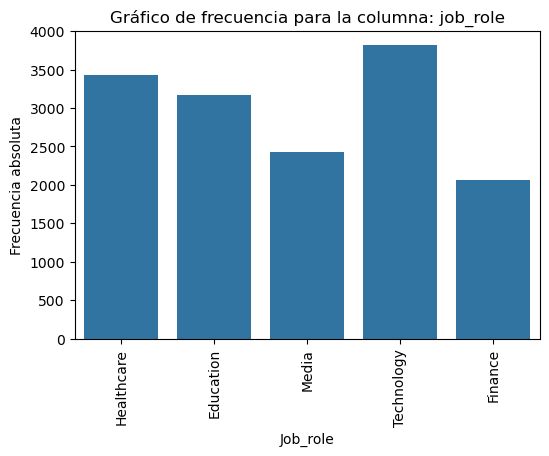

                   Frecuencia relativa (%)
work_life_balance                         
Good                             37.785235
Fair                             30.087248
Excellent                        18.208054
Poor                             13.919463


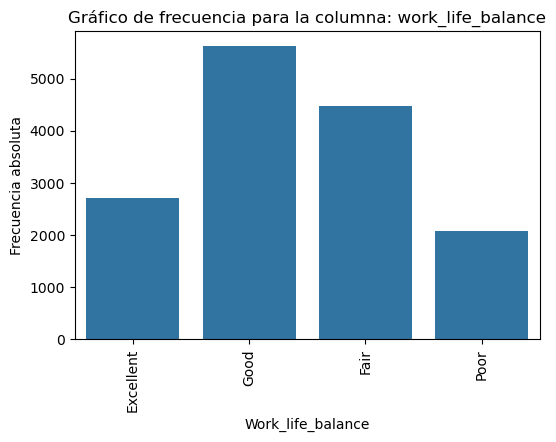

                  Frecuencia relativa (%)
job_satisfaction                         
High                            50.107383
Very High                       19.919463
Medium                          19.463087
Low                             10.510067


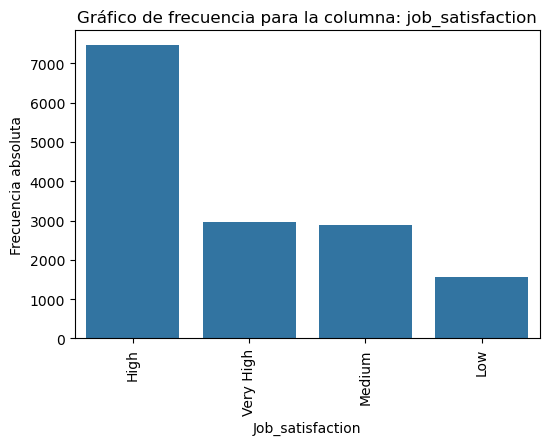

                    Frecuencia relativa (%)
performance_rating                         
Average                           59.791946
High                              20.281879
Below Average                     14.691275
Low                                5.234899


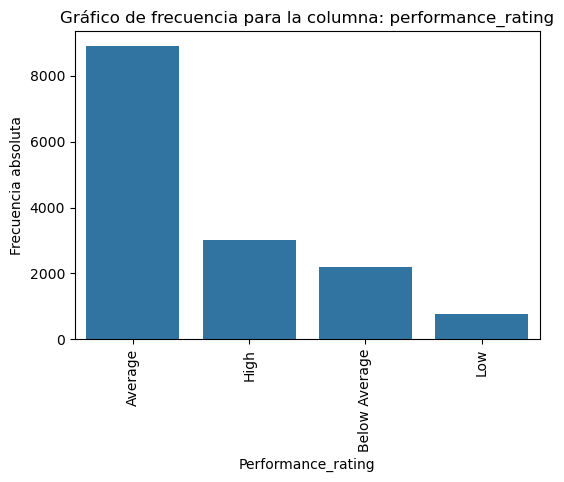

          Frecuencia relativa (%)
overtime                         
No                      67.174497
Yes                     32.825503


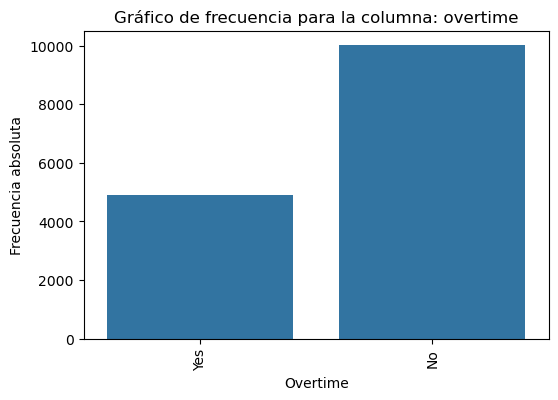

                   Frecuencia relativa (%)
education_level                           
Bachelor’s Degree                30.234899
Associate Degree                 25.060403
Master’s Degree                  20.140940
High School                      19.677852
PhD                               4.885906


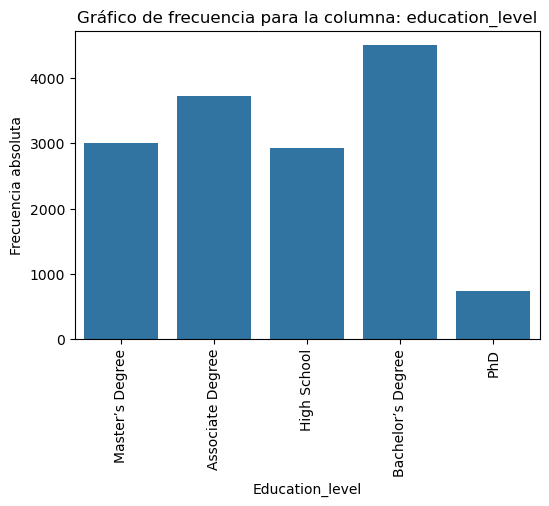

                Frecuencia relativa (%)
marital_status                         
Married                       50.409396
Single                        34.671141
Divorced                      14.919463


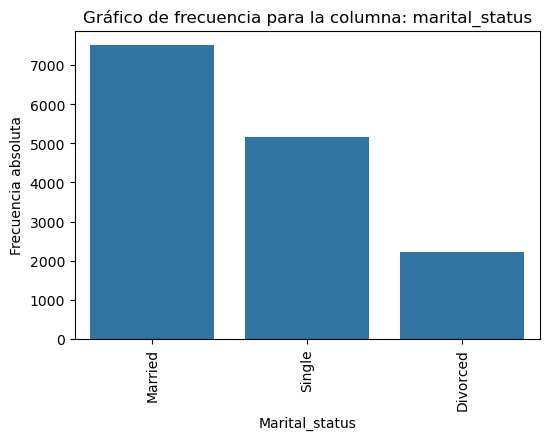

           Frecuencia relativa (%)
job_level                         
Mid                      39.765101
Entry                    39.684564
Senior                   20.550336


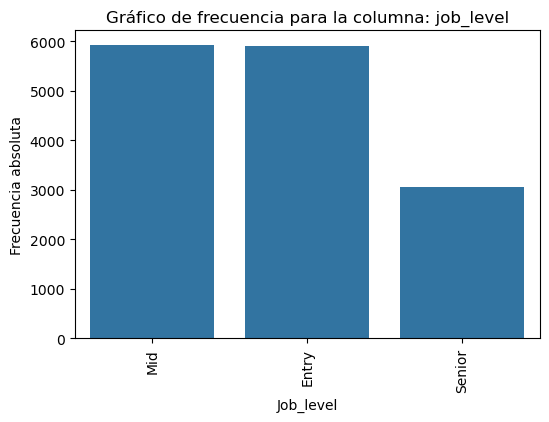

              Frecuencia relativa (%)
company_size                         
Medium                      50.241611
Small                       29.664430
Large                       20.093960


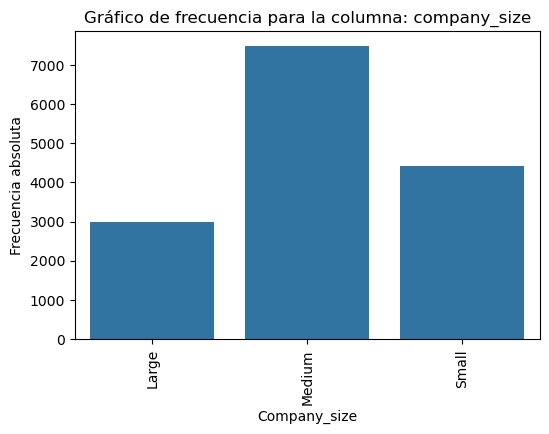

             Frecuencia relativa (%)
remote_work                         
No                         80.946309
Yes                        19.053691


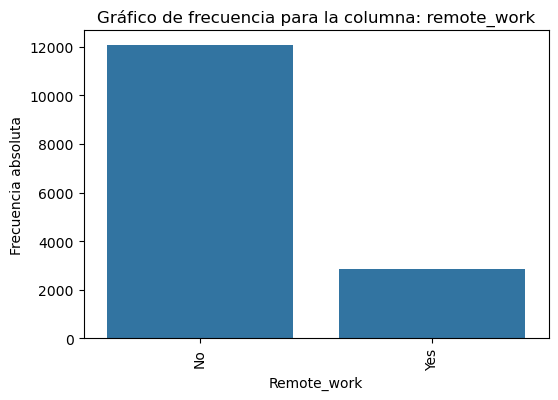

                          Frecuencia relativa (%)
leadership_opportunities                         
No                                      95.067114
Yes                                      4.932886


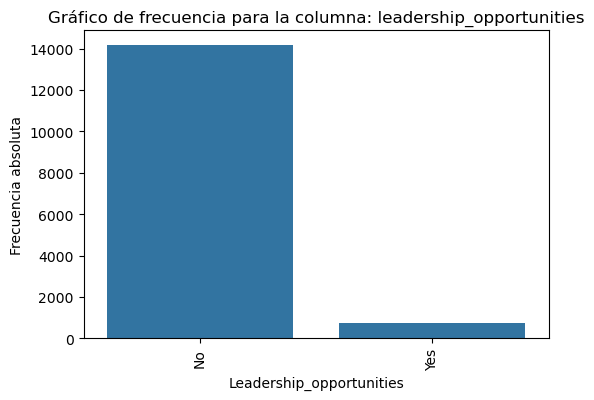

                          Frecuencia relativa (%)
innovation_opportunities                         
No                                      83.885906
Yes                                     16.114094


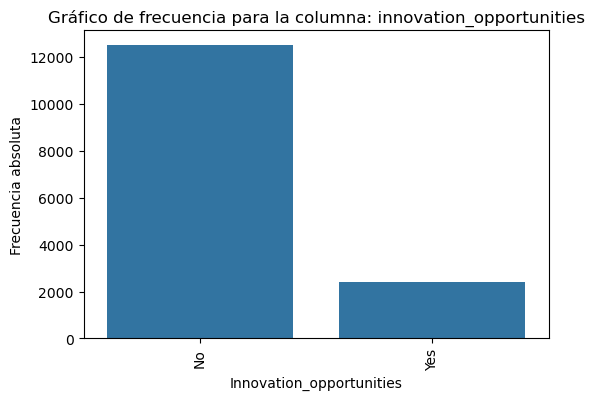

                    Frecuencia relativa (%)
company_reputation                         
Good                              49.771812
Poor                              20.684564
Fair                              19.926174
Excellent                          9.617450


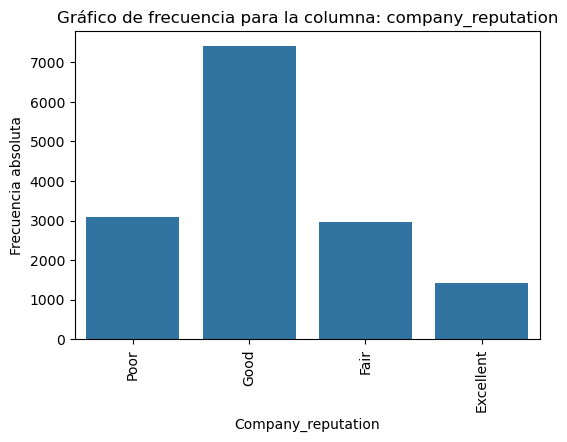

                      Frecuencia relativa (%)
employee_recognition                         
Low                                 39.342282
Medium                              31.033557
High                                24.872483
Very High                            4.751678


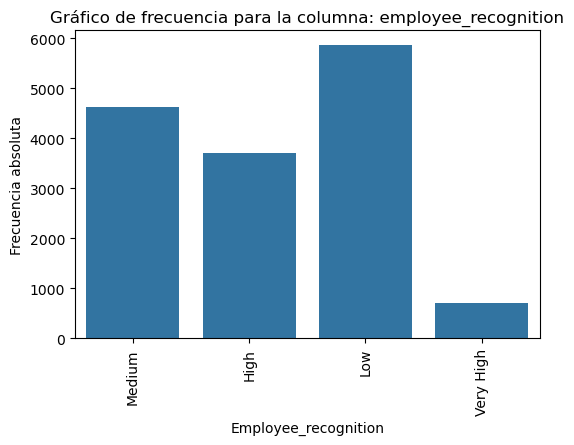

           Frecuencia relativa (%)
attrition                         
Stayed                   52.805369
Left                     47.194631


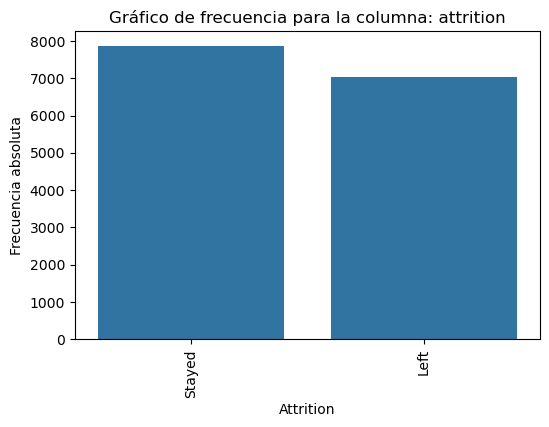

In [10]:
# loop runs the function for each column in data_categorical
for colum in data_categorical.columns:
    eda_uni_cat(data_categorical, colum)

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0960



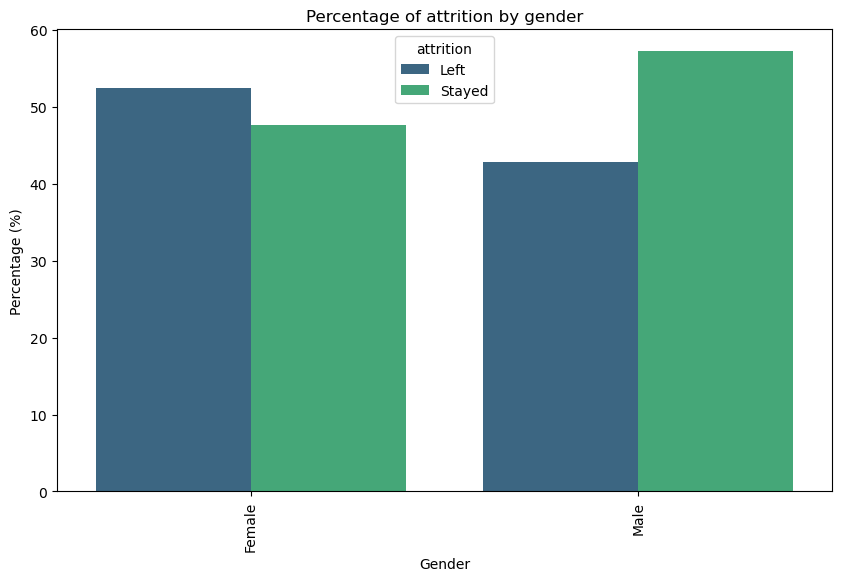

p-value de Chi-cuadrado: 0.0073
Cramér's V: 0.0306



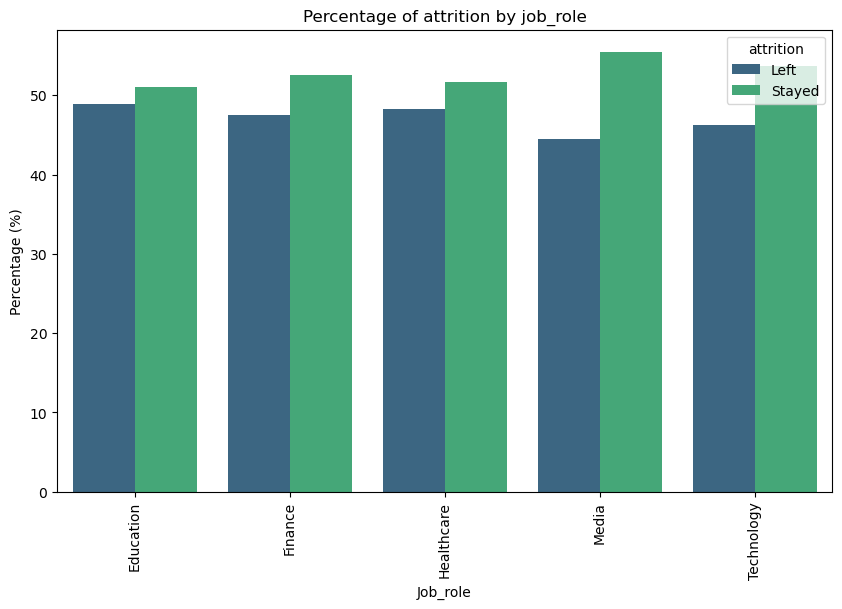

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.2080



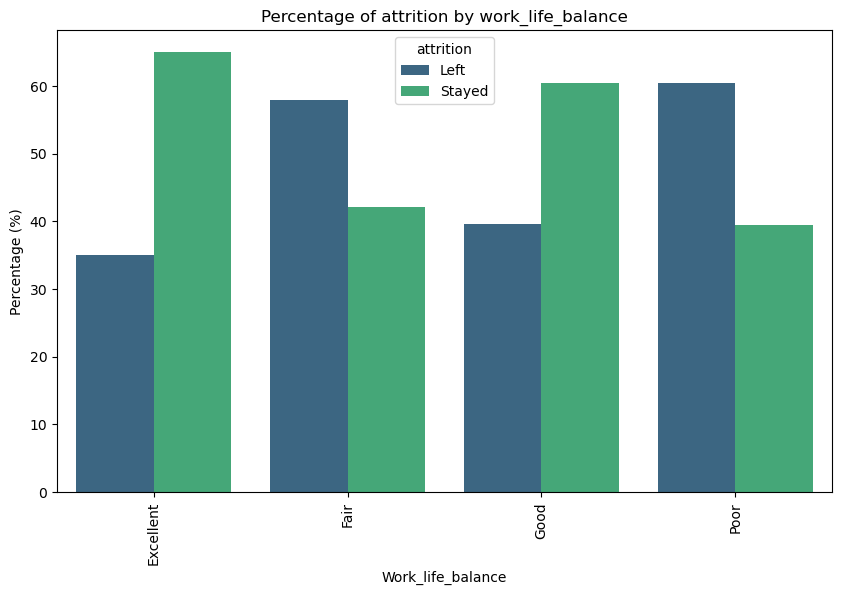

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0885



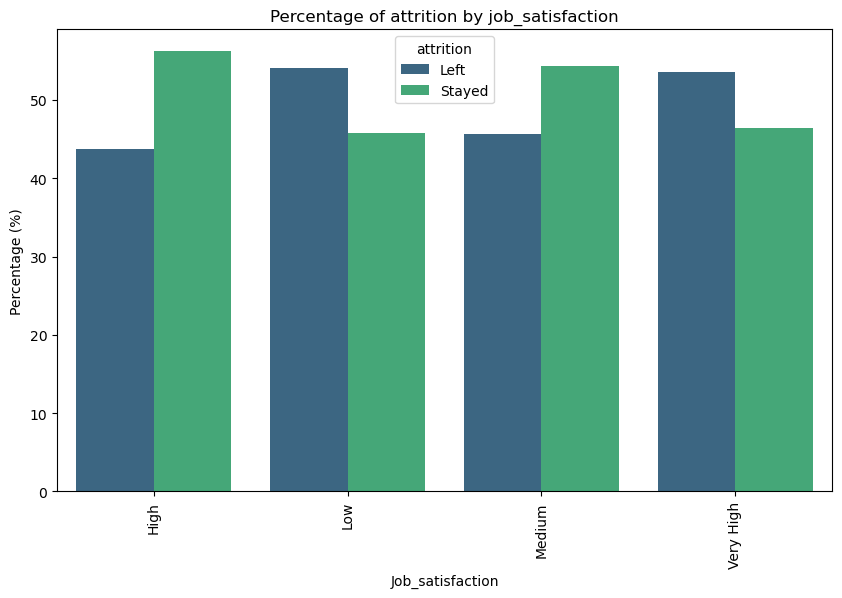

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0506



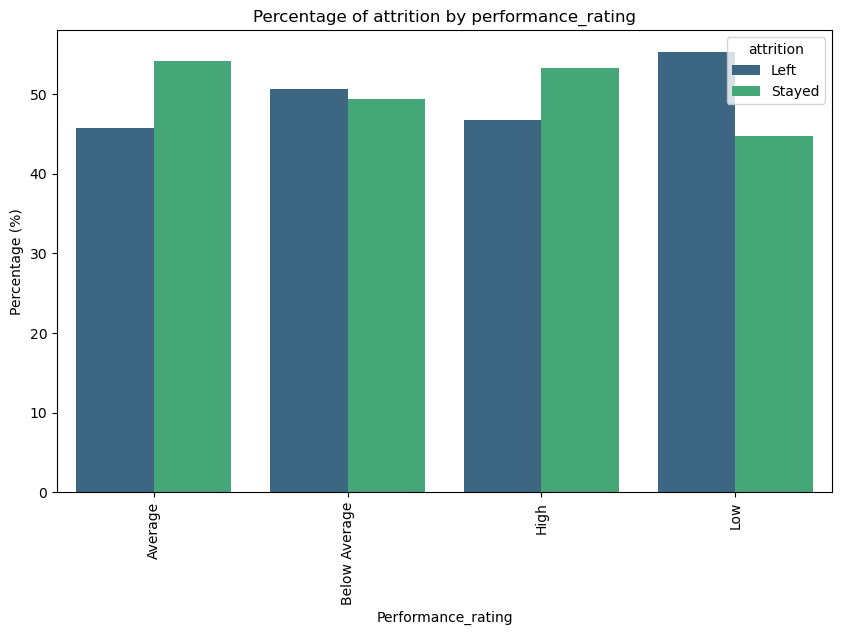

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0575



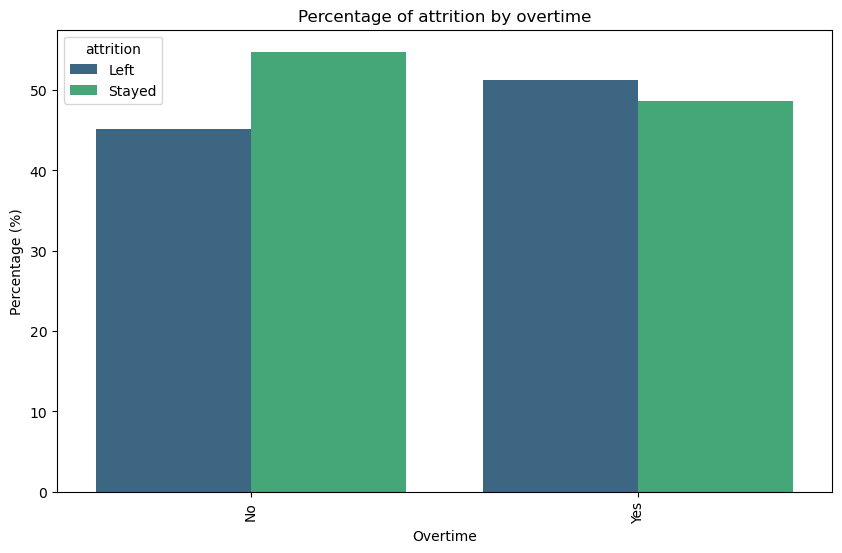

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.1130



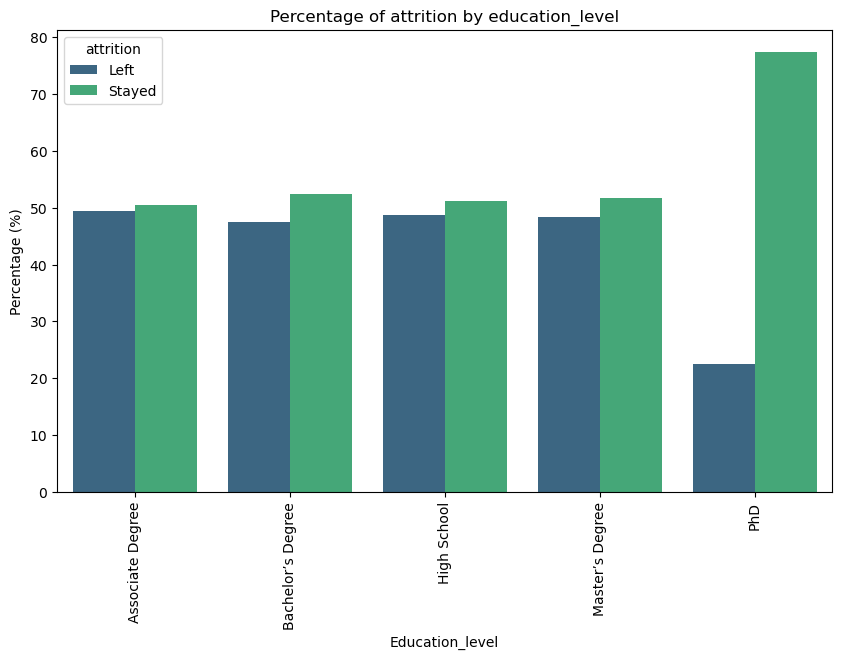

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.2859



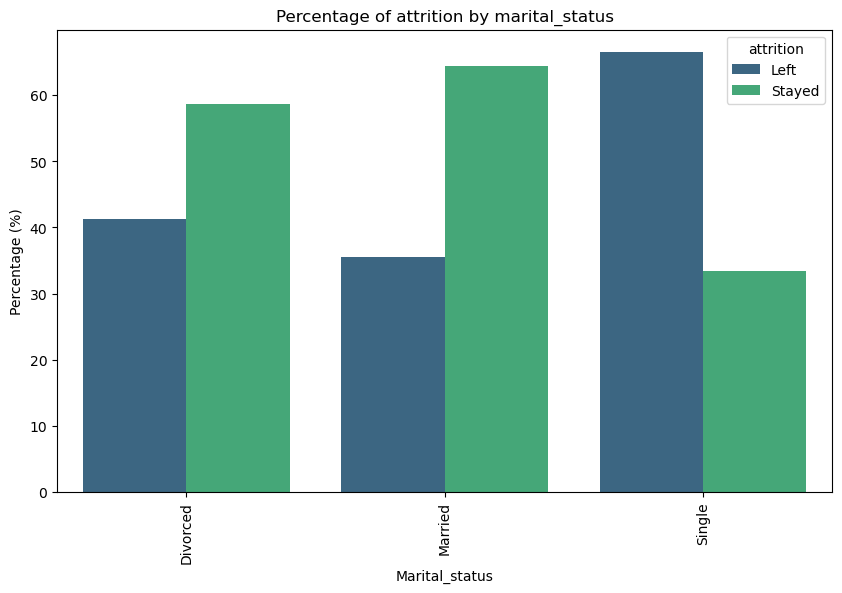

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.3231



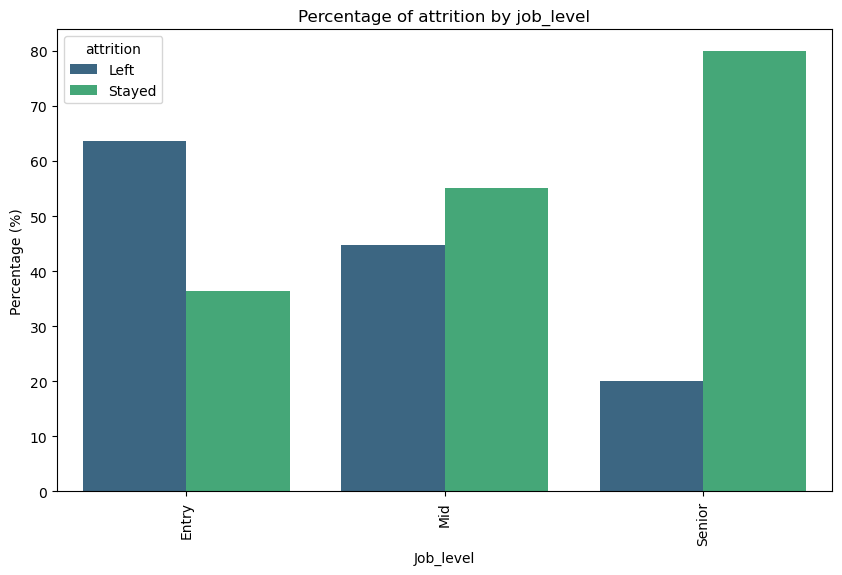

p-value de Chi-cuadrado: 0.0281
Cramér's V: 0.0219



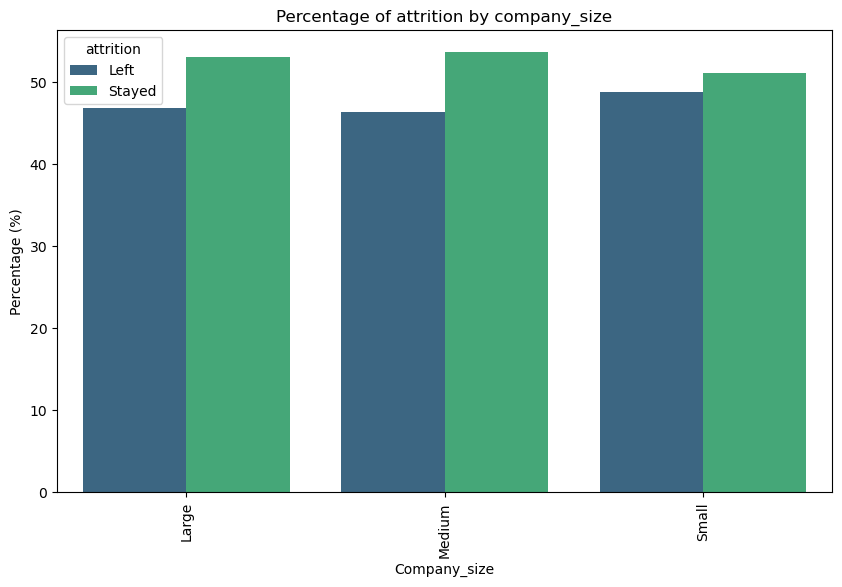

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.2242



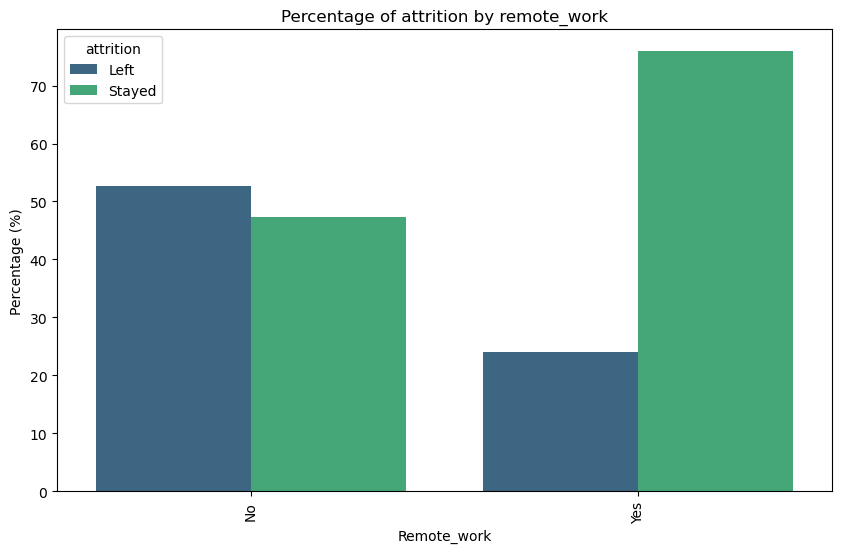

p-value de Chi-cuadrado: 0.0213
Cramér's V: 0.0192



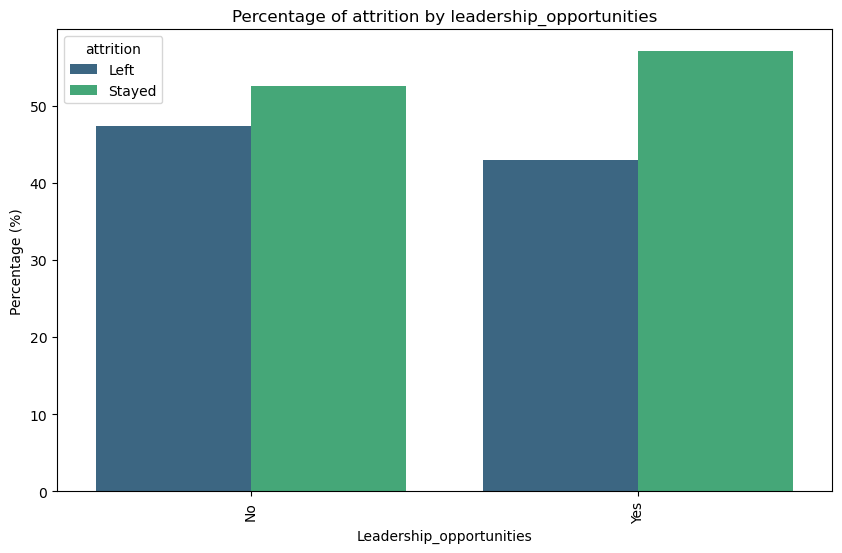

p-value de Chi-cuadrado: 0.0089
Cramér's V: 0.0216



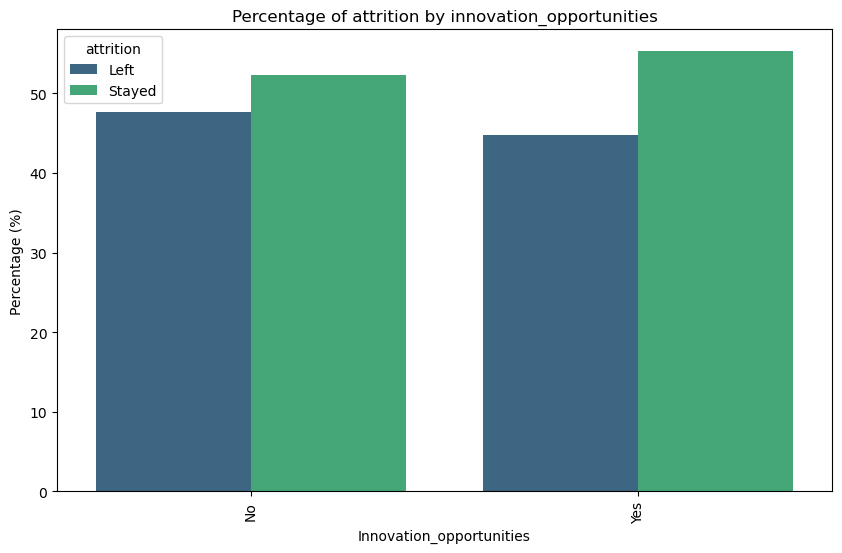

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0926



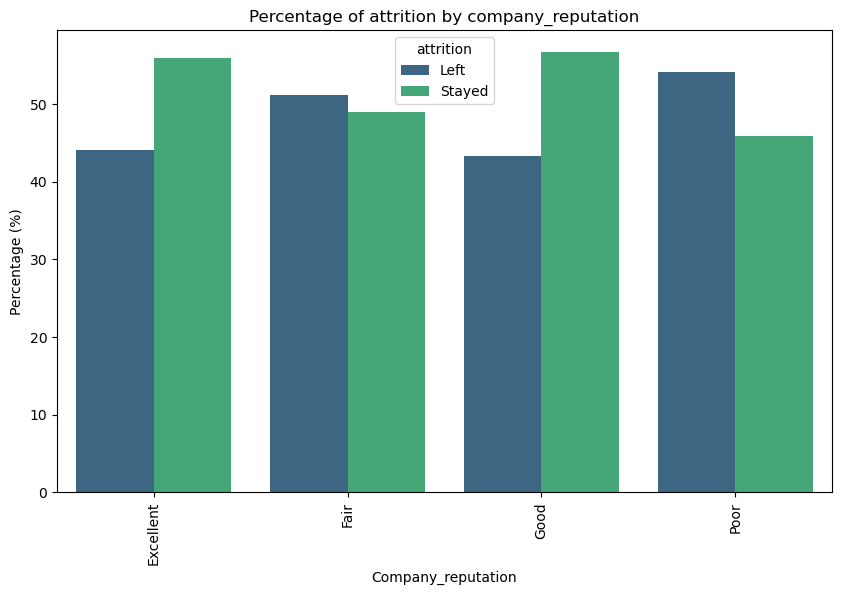

p-value de Chi-cuadrado: 0.5729
Cramér's V: 0.0116



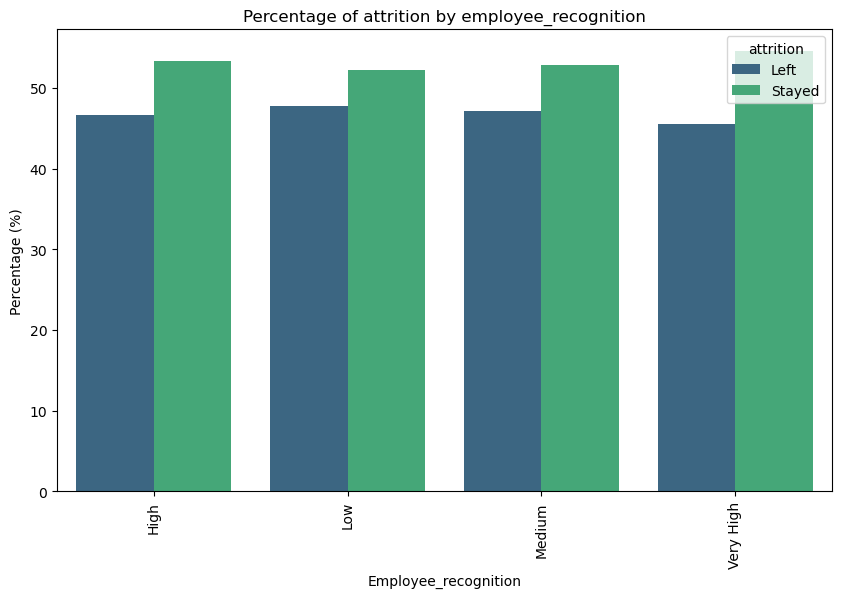

In [11]:
# loop runs the function for each column in data_categorical
for colum in data_categorical.columns[0:-1]:
    eda_bi_cat(data, colum, 'attrition')

## EDA numerical columns

Univariate and bivariate exploratory data analysis (EDA) for **numerical columns**.

We check the correlation between numerical columns and the target variable (attrition).

In [12]:
#the correlation for each numerical column with attrition
data_numerical.corrwith(data_categorical['attrition'].replace({'Stayed': 0, 'Left': 1})) # attrition is converted to numerical values 

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_21944\2802684726.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numerical.corrwith(data_categorical['attrition'].replace({'Stayed': 0, 'Left': 1})) # attrition is converted to numerical values


age                    -0.058488
years_at_company       -0.067415
monthly_income         -0.007973
number_of_promotions   -0.083544
distance_from_home      0.086942
number_of_dependents   -0.059540
company_tenure         -0.023702
dtype: float64

`eda_numerical_analysis` performs two types of analysis on each numerical column:

- Univariate Analysis: A **histogram** with a KDE (Kernel Density Estimate) plot to visualize the distribution of each numerical column

- Bivariate Analysis: A **KDE plot** and **boxplot** to compare the distribution of the numerical column across the target variable (attrition).


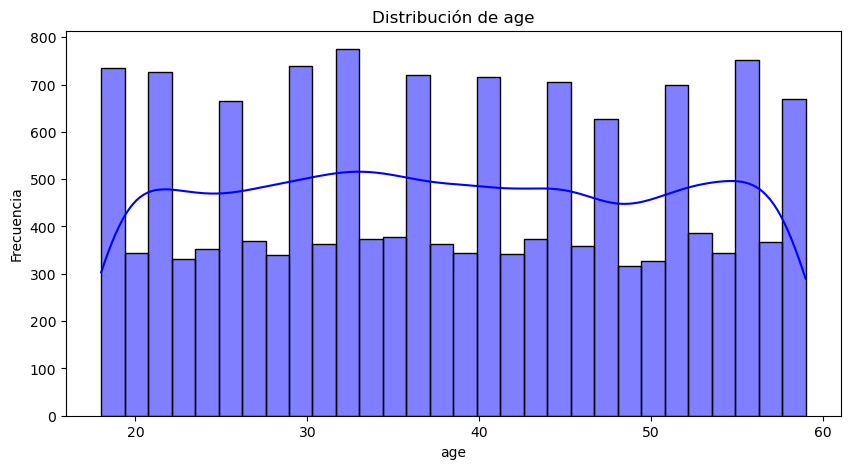

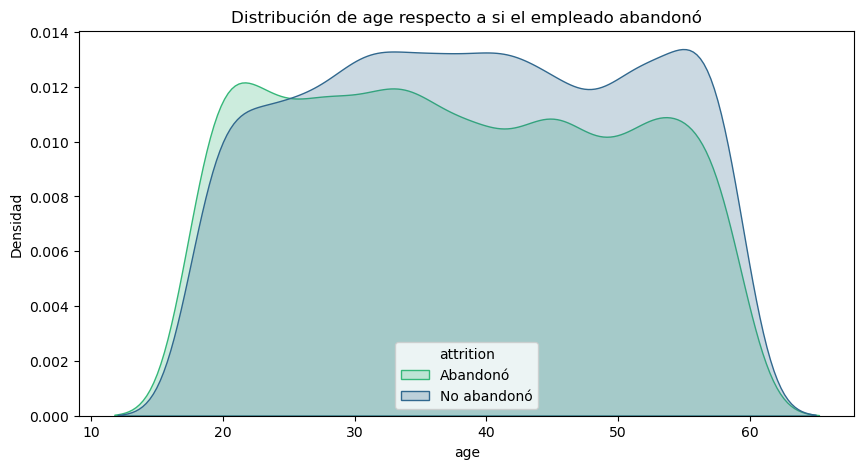

c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=hue_column, y=column, palette='viridis')


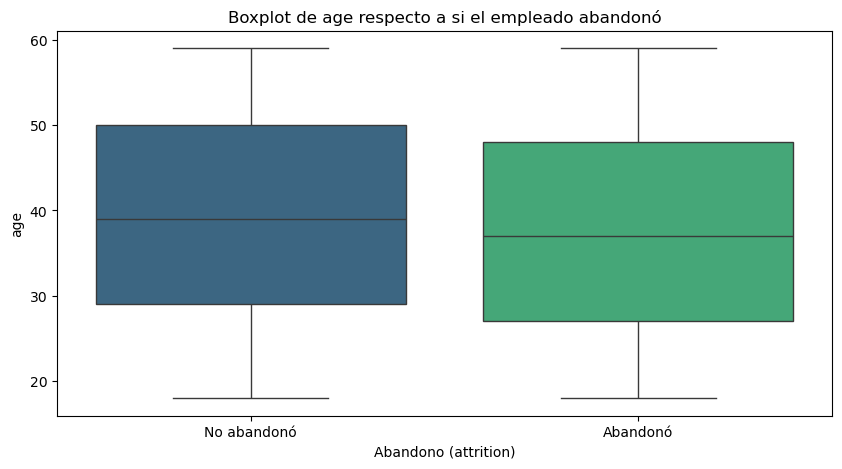

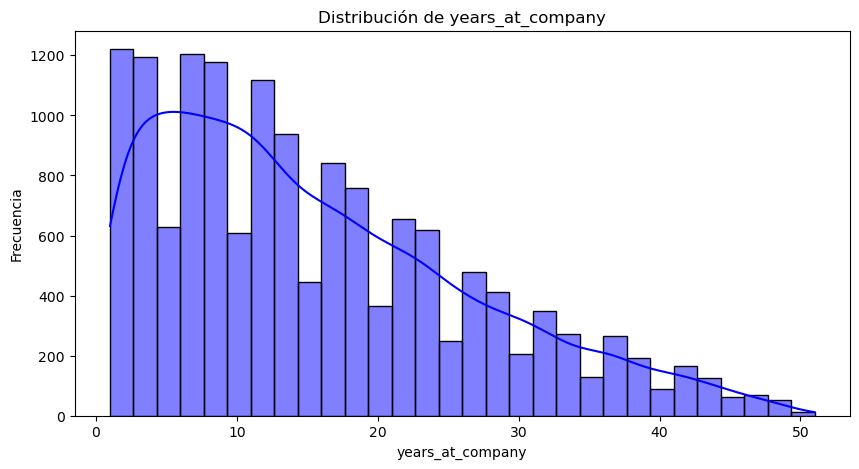

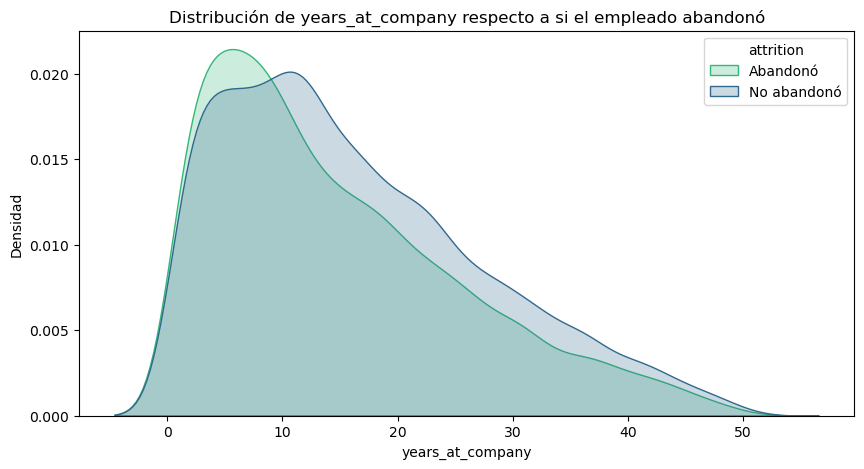

c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=hue_column, y=column, palette='viridis')


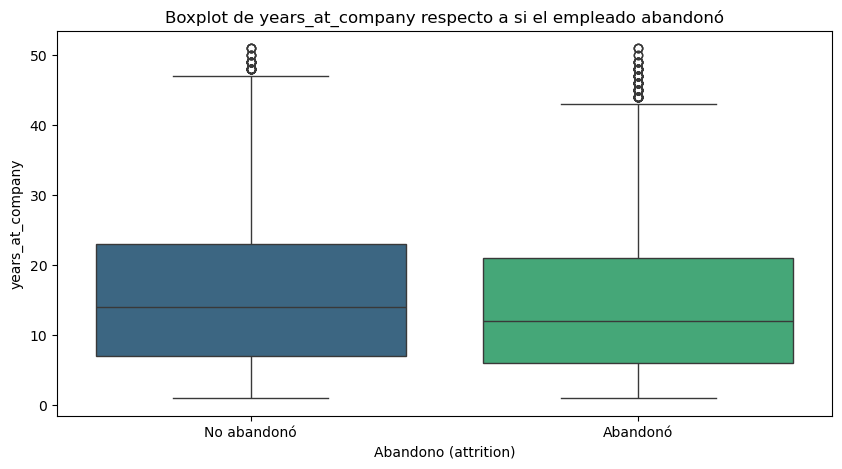

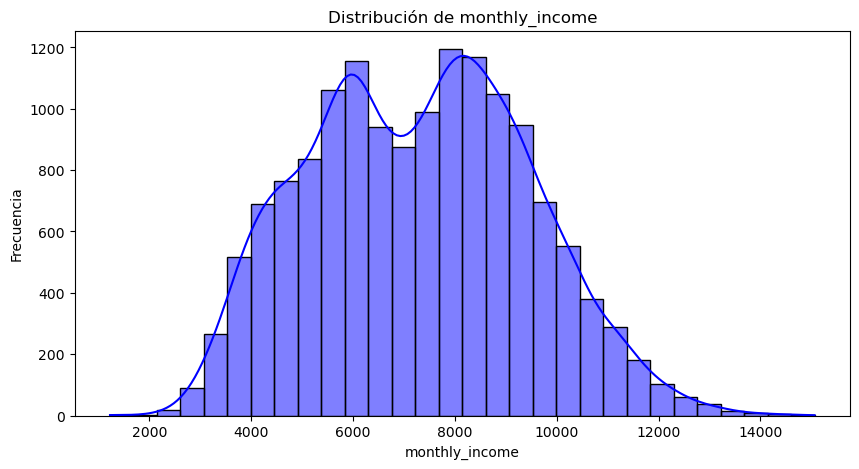

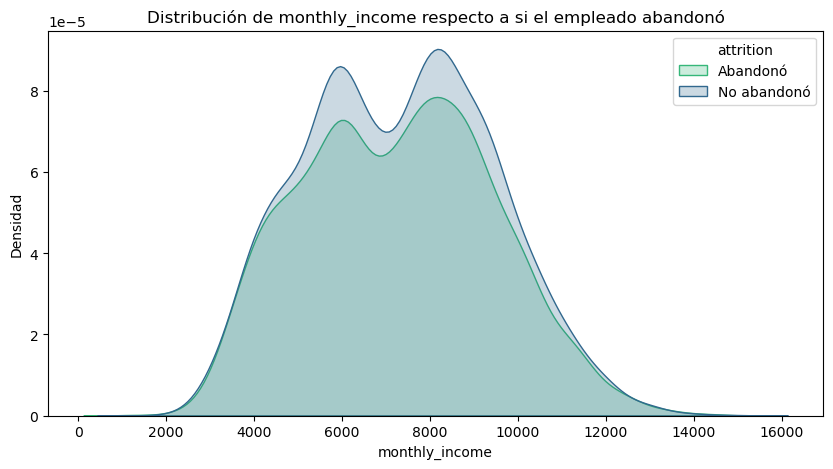

c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=hue_column, y=column, palette='viridis')


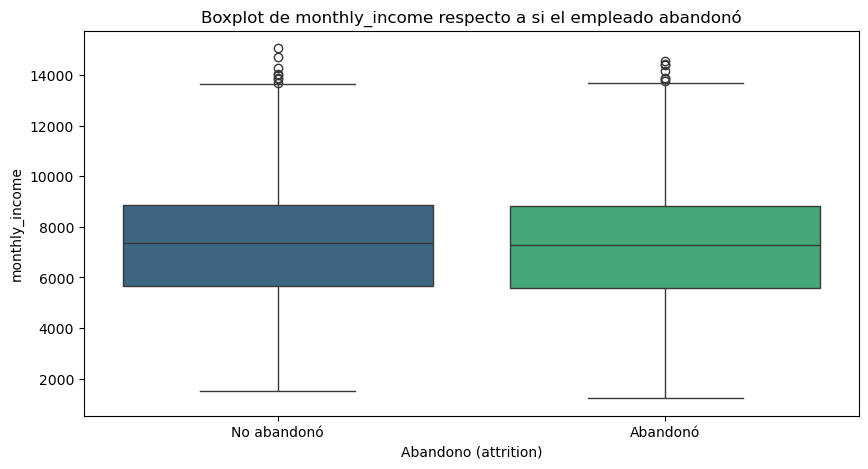

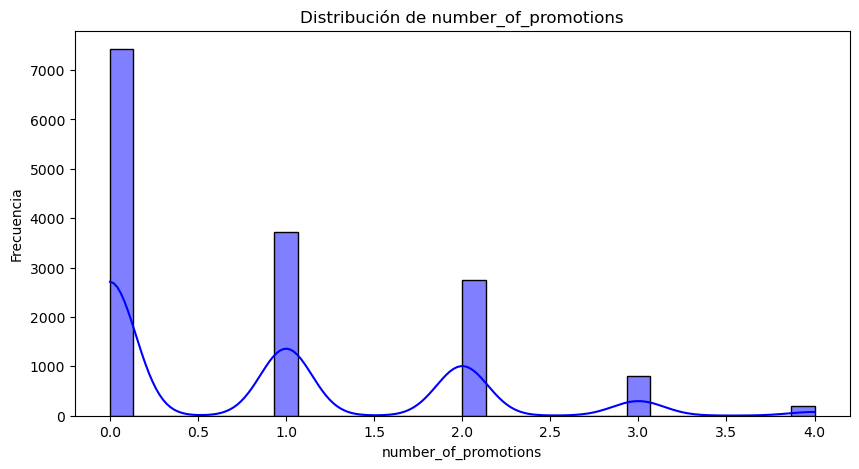

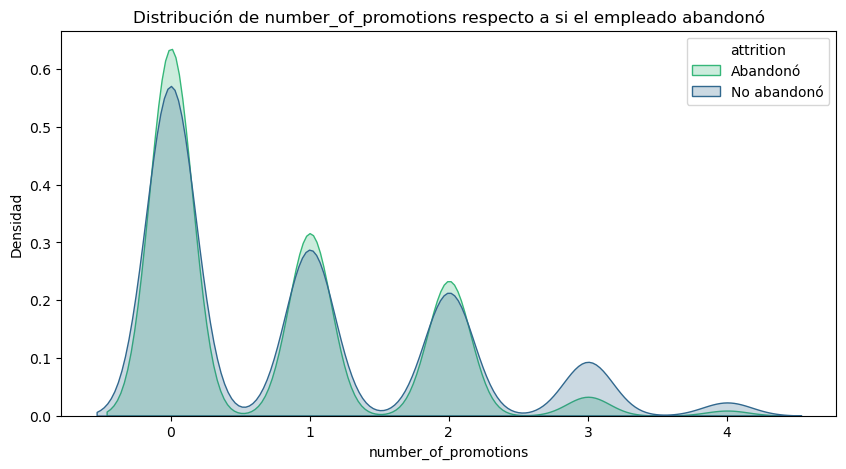

c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=hue_column, y=column, palette='viridis')


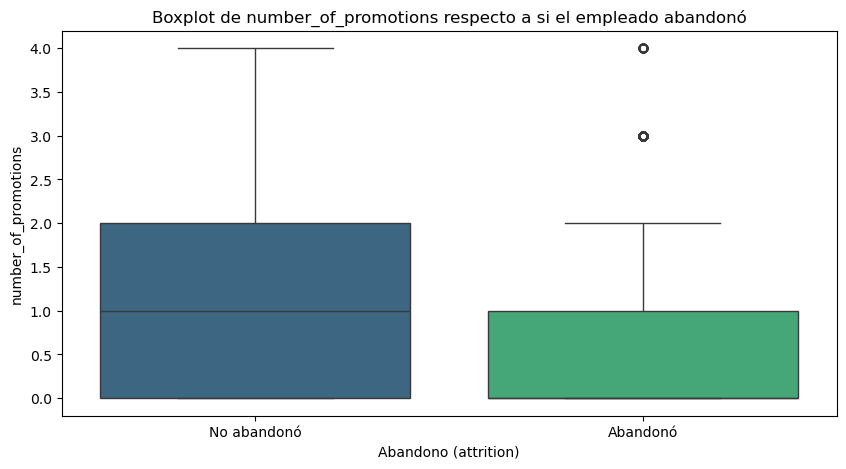

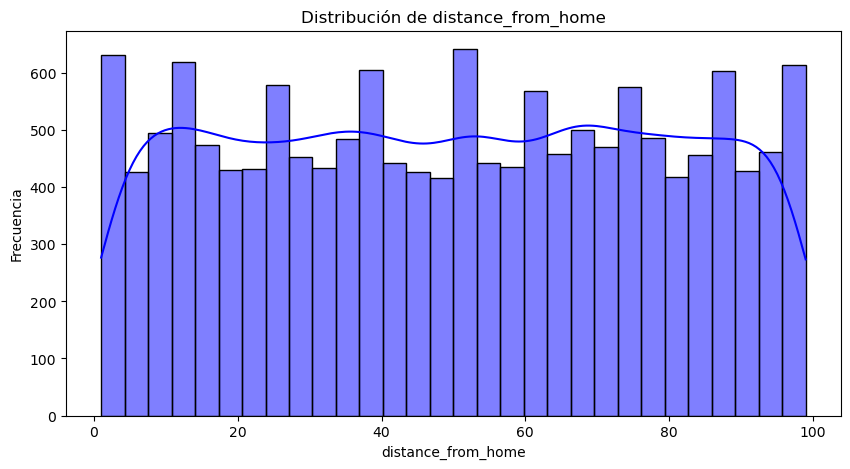

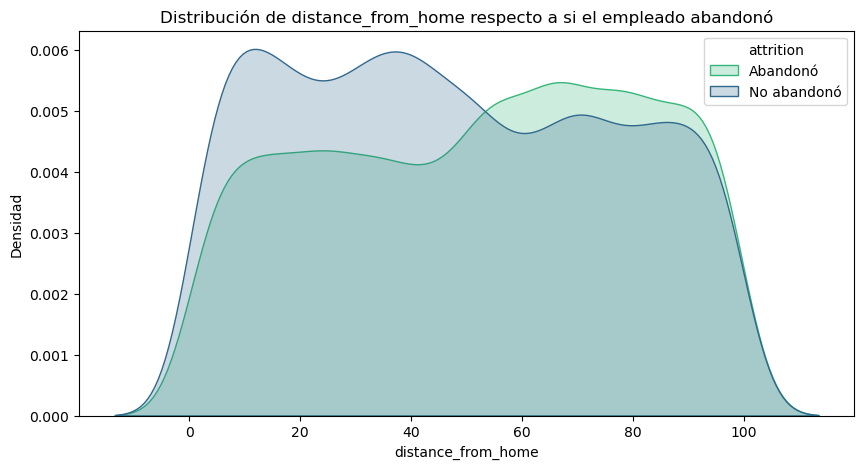

c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=hue_column, y=column, palette='viridis')


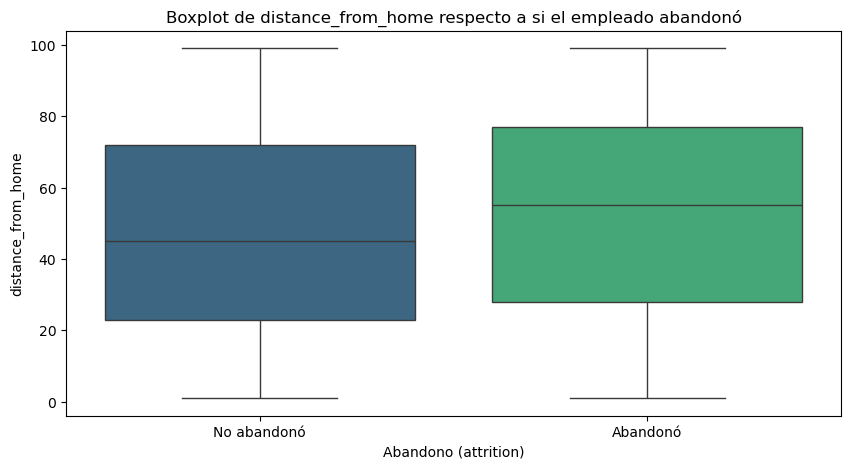

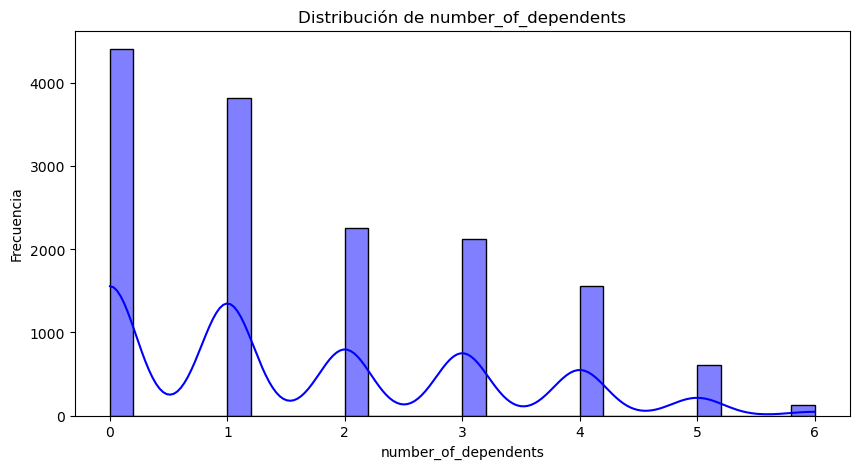

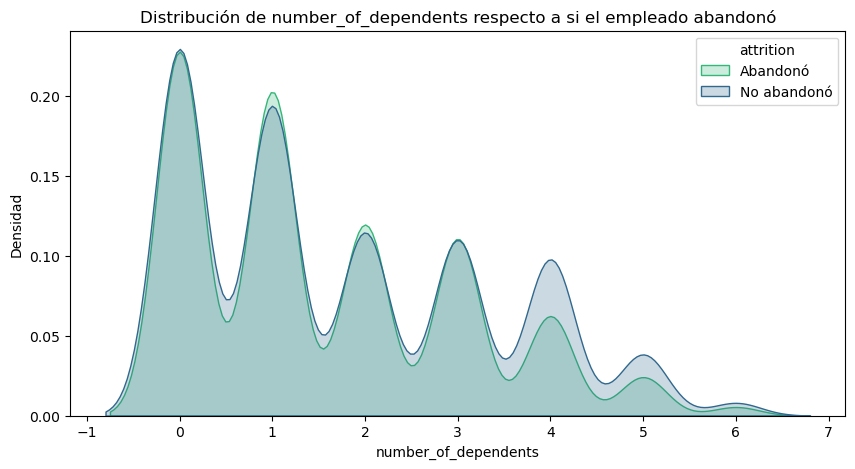

c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=hue_column, y=column, palette='viridis')


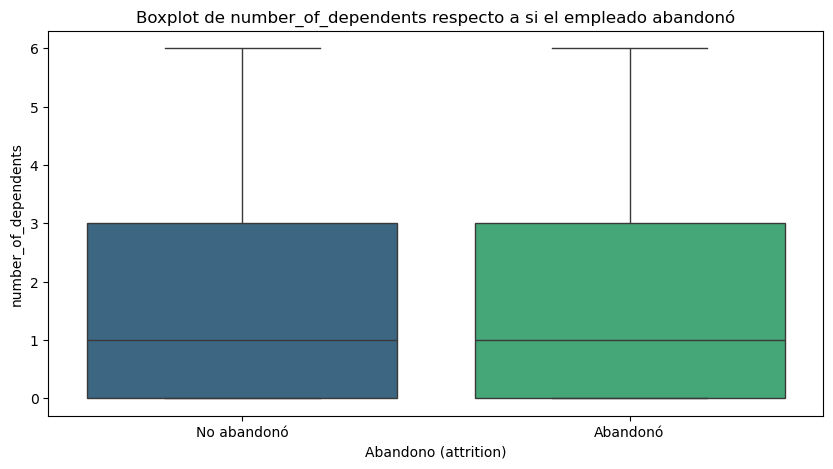

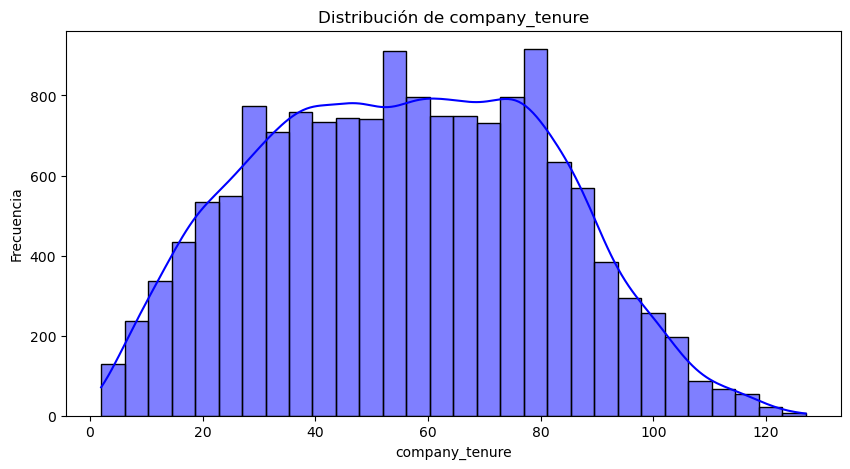

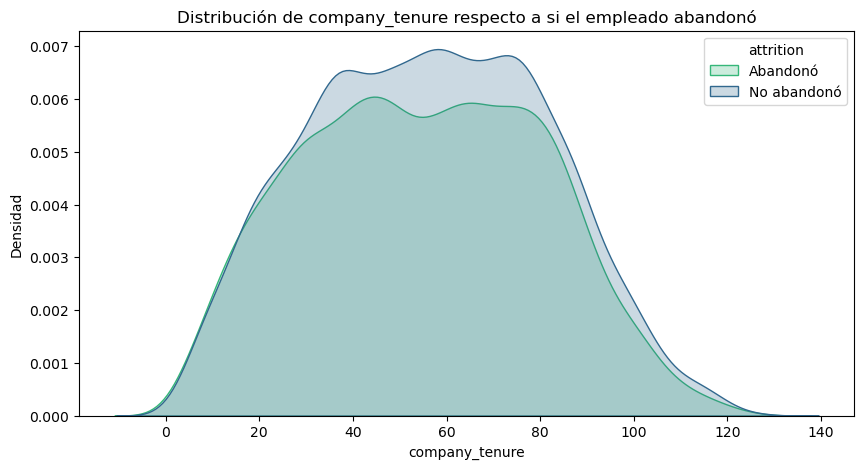

c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=hue_column, y=column, palette='viridis')


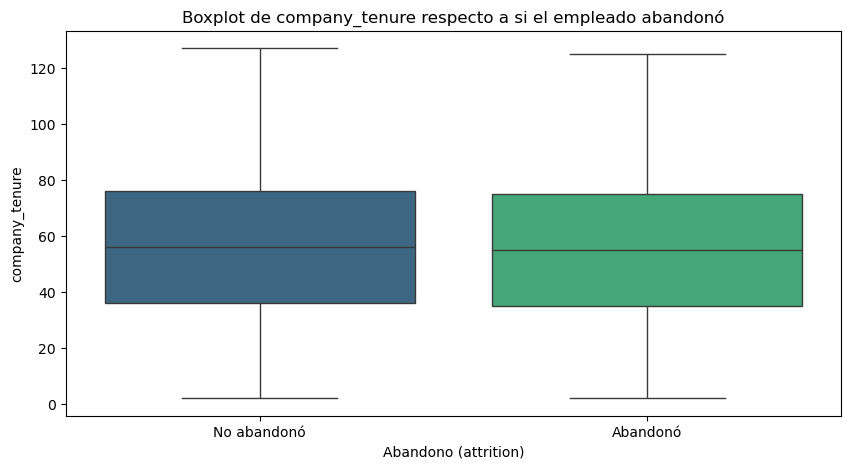

In [13]:
# Run the function
eda_numerical_analysis(data, data_numerical)

## Feature Engineering

A copy of the original dataset is created to preserve the original data

In [14]:
# Create a copy of the data
data_copy = data.copy()

**Defining Column Types**

We separate the columns according to the formatting changes that must be applied to them.

In [15]:
# Binary columns (Yes/No) that need to be converted into numerical format (1 for Yes, 0 for No).
yes_no_cols = ['overtime', 'remote_work', 'leadership_opportunities', 'innovation_opportunities']

# Categorical columns where the categories have no inherent order
nominal_cols = ['gender', 'job_role', 'marital_status']

# Categorical columns where the categories follow a specific order
ordinal_cols = ['work_life_balance', 'job_satisfaction', 'performance_rating', 'education_level', 'job_level',
                'company_size', 'company_reputation', 'employee_recognition' ]

# Continuous or discrete numerical columns
numerical_cols =['age', 'years_at_company', 'monthly_income', 'number_of_promotions', 'distance_from_home',
                 'number_of_dependents', 'company_tenure']

# Target variable.
target_col = ['attrition']

`yes_no_to_numeric` replaces 'Yes' with 1 and 'No' with 0 in the columns specified in a list

In [16]:
# Run the function to convert Yes/No to 1/0
yes_no_to_numeric(data_copy, yes_no_cols)

c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:188: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(yes_no_dict, inplace=True)
c:\Users\Laura Ortiz\Documents\GitHub\how_to_prevent_employee_burnout\notebook\lib\functions.py:188: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fut

,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,overtime,distance_from_home,education_level,marital_status,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,1,83,Master’s Degree,Married,1,Mid,Large,22,0,0,0,Poor,Medium,Stayed
1,35,Male,7,Education,4563,Good,High,Average,1,1,55,Associate Degree,Single,4,Entry,Medium,27,0,0,0,Good,High,Left
2,50,Male,7,Education,5583,Fair,High,Average,3,1,14,Associate Degree,Divorced,2,Senior,Medium,76,0,0,1,Good,Low,Stayed
3,58,Male,44,Media,5525,Fair,Very High,High,0,1,43,Master’s Degree,Single,4,Entry,Medium,96,0,0,0,Poor,Low,Left
4,39,Male,24,Education,4604,Good,High,Average,0,1,47,Master’s Degree,Married,6,Mid,Large,45,1,0,0,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,1,40,Associate Degree,Single,0,Senior,Medium,60,0,0,0,Poor,Medium,Stayed
14896,30,Female,15,Education,3856,Good,Medium,Average,2,1,45,Master’s Degree,Married,0,Entry,Medium,20,0,0,0,Good,Medium,Left
14897,52,Male,5,Education,5654,Good,Very High,Below Average,0,0,4,Associate Degree,Married,4,Mid,Small,7,0,0,0,Good,High,Left
14898,18,Male,4,Education,5276,Fair,High,Average,0,0,13,Bachelor’s Degree,Divorced,3,Mid,Large,5,0,0,0,Poor,High,Stayed


**One-hot encoding** creates new binary columns for each category in the nominal_cols list.

In [17]:
# One-hot encoding for sex and title
data_copy = pd.get_dummies(data_copy, columns=nominal_cols)
data_copy

,age,years_at_company,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,overtime,distance_from_home,education_level,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,gender_Female,gender_Male,job_role_Education,job_role_Finance,job_role_Healthcare,job_role_Media,job_role_Technology,marital_status_Divorced,marital_status_Married,marital_status_Single
0,36,13,8029,Excellent,High,Average,1,1,83,Master’s Degree,1,Mid,Large,22,0,0,0,Poor,Medium,Stayed,False,True,False,False,True,False,False,False,True,False
1,35,7,4563,Good,High,Average,1,1,55,Associate Degree,4,Entry,Medium,27,0,0,0,Good,High,Left,False,True,True,False,False,False,False,False,False,True
2,50,7,5583,Fair,High,Average,3,1,14,Associate Degree,2,Senior,Medium,76,0,0,1,Good,Low,Stayed,False,True,True,False,False,False,False,True,False,False
3,58,44,5525,Fair,Very High,High,0,1,43,Master’s Degree,4,Entry,Medium,96,0,0,0,Poor,Low,Left,False,True,False,False,False,True,False,False,False,True
4,39,24,4604,Good,High,Average,0,1,47,Master’s Degree,6,Mid,Large,45,1,0,0,Good,High,Stayed,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,42,7830,Poor,Medium,Average,0,1,40,Associate Degree,0,Senior,Medium,60,0,0,0,Poor,Medium,Stayed,True,False,False,False,True,False,False,False,False,True
14896,30,15,3856,Good,Medium,Average,2,1,45,Master’s Degree,0,Entry,Medium,20,0,0,0,Good,Medium,Left,True,False,True,False,False,False,False,False,True,False
14897,52,5,5654,Good,Very High,Below Average,0,0,4,Associate Degree,4,Mid,Small,7,0,0,0,Good,High,Left,False,True,True,False,False,False,False,False,True,False
14898,18,4,5276,Fair,High,Average,0,0,13,Bachelor’s Degree,3,Mid,Large,5,0,0,0,Poor,High,Stayed,False,True,True,False,False,False,False,True,False,False


An **OrdinalEncoder** is created with the specific order of categories, and the encoder is fitted to transform the ordinal columns into numerical values according to the specified order.

In [18]:
# Defining Category Orders
categories = [['Poor', 'Fair', 'Good', 'Excellent'],  # Work Life Balance
              ['Very Low', 'Low', 'Medium', 'High', 'Very High'], # Job Satisfaction
              ['Low', 'Below Average', 'Average', 'High'], # Performance Rating
              ['High School', 'Associate Degree', "Bachelor’s Degree", "Master’s Degree", 'PhD'], # Education Level
              ['Entry', 'Mid', 'Senior'], # Job Level          
              ['Small', 'Medium', 'Large'], # Company Size
              ['Poor', 'Fair', 'Good', 'Excellent'], # Company Reputation
              ['Very Low', 'Low', 'Medium', 'High', 'Very High'] # Employee Recognition
              ]

In [19]:
# Applying Ordinal Encoding
encoder = OrdinalEncoder(categories=categories)
encoded_data = encoder.fit_transform(data_copy[ordinal_cols])


In [20]:
# Replacing Encoded Data
df_encoded = pd.DataFrame(encoded_data, columns=ordinal_cols)
data_copy[ordinal_cols] = df_encoded[ordinal_cols]

In [21]:
# Check the result
data_copy

,age,years_at_company,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,overtime,distance_from_home,education_level,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,gender_Female,gender_Male,job_role_Education,job_role_Finance,job_role_Healthcare,job_role_Media,job_role_Technology,marital_status_Divorced,marital_status_Married,marital_status_Single
0,36,13,8029,3.0,3.0,2.0,1,1,83,3.0,1,1.0,2.0,22,0,0,0,0.0,2.0,Stayed,False,True,False,False,True,False,False,False,True,False
1,35,7,4563,2.0,3.0,2.0,1,1,55,1.0,4,0.0,1.0,27,0,0,0,2.0,3.0,Left,False,True,True,False,False,False,False,False,False,True
2,50,7,5583,1.0,3.0,2.0,3,1,14,1.0,2,2.0,1.0,76,0,0,1,2.0,1.0,Stayed,False,True,True,False,False,False,False,True,False,False
3,58,44,5525,1.0,4.0,3.0,0,1,43,3.0,4,0.0,1.0,96,0,0,0,0.0,1.0,Left,False,True,False,False,False,True,False,False,False,True
4,39,24,4604,2.0,3.0,2.0,0,1,47,3.0,6,1.0,2.0,45,1,0,0,2.0,3.0,Stayed,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,42,7830,0.0,2.0,2.0,0,1,40,1.0,0,2.0,1.0,60,0,0,0,0.0,2.0,Stayed,True,False,False,False,True,False,False,False,False,True
14896,30,15,3856,2.0,2.0,2.0,2,1,45,3.0,0,0.0,1.0,20,0,0,0,2.0,2.0,Left,True,False,True,False,False,False,False,False,True,False
14897,52,5,5654,2.0,4.0,1.0,0,0,4,1.0,4,1.0,0.0,7,0,0,0,2.0,3.0,Left,False,True,True,False,False,False,False,False,True,False
14898,18,4,5276,1.0,3.0,2.0,0,0,13,2.0,3,1.0,2.0,5,0,0,0,0.0,3.0,Stayed,False,True,True,False,False,False,False,True,False,False


**Target Column Transformation**

The ``attrition`` column is transformed into numerical values, where 0 represents employees who stayed, and 1 represents employees who left.

In [ ]:
# Attrition is transformed into numerical values
data_copy['attrition'] = data_copy['attrition'].replace({'Stayed': 0, 'Left': 1})

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_21944\99127479.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy['attrition'] = data_copy['attrition'].replace({'Stayed': 0, 'Left': 1})


In [23]:
# Reordering Columns. 
data_copy['attrition'] = data_copy.pop('attrition')

## Heatmap

This calculates the **correlation matrix** for all numerical columns, including transformed columns. We use a mask that hides the upper triangle of the correlation matrix.

In [24]:
# Calculate the correlation matrix
correlation_matrix = data_copy.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Add the mask to the correlation matrix
correlation_matrix_masked = correlation_matrix.mask(mask)

# Create a heatmap using Plotly Express
fig = px.imshow(correlation_matrix_masked,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='Correlation Heatmap of Numerical Variables (Half)')

# Defining the dimensions of the plot
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    width=1000,
    height=800
)

# Add the correlation values as annotations 
for i in range(len(correlation_matrix)):
    for j in range(i):  # Only add the lower triangle
        value = correlation_matrix.values[i, j]
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )

# Show the plot
fig.show()

## Perform Train Test Split

**Separating Features and Target**

In [25]:
# Split the data into features and target
x = data_copy.drop(columns=['attrition'])
y = data_copy['attrition']

**Splitting the Data into Training and Testing Sets**

- 80% of the data used to train the model.
- 20% of the data reserved for testing the model's performance.

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Normalization Using ``MinMaxScaler``**

In [27]:
# Normalize the data
normalizer = MinMaxScaler()

X_train_norm = normalizer.fit_transform(X_train)

X_test_norm = normalizer.transform(X_test)


**Standardization Using ``StandardScaler``**

In [28]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## First Models

### KNN Model on Raw, Normalized, and Standardized Data (Full Dataset)

We runs K-Nearest Neighbors (KNN) classification models using the full set of features. We’re testing the models on raw data, normalized data, and standardized data.

**KNN on Raw Data**

In [29]:
# KNN Raw data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.4f}")

Model accuracy: 0.5117


**KNN on Normalized Data**

In [30]:
# KNN Normalized data
knn_norm = KNeighborsClassifier()
knn_norm.fit(X_train_norm, y_train)
accuracy_norm = knn_norm.score(X_test_norm, y_test)
print(f"Model accuracy: {accuracy_norm:.4f}")

Model accuracy: 0.6826


**KNN on Standardized Data**

In [31]:
# KNNstandarized data
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = knn_scaled.score(X_test_scaled, y_test)
print(f"Model accuracy: {accuracy_scaled:.4f}")

Model accuracy: 0.6648


### KNN Model on Selected Features (Correlation-Based)


In this section, we runs K-Nearest Neighbors (KNN) classification models, using a subset of features based on their correlation with the target variable (attrition). We’re testing the models on raw data, normalized data, and standardized data.

In [32]:
# Selecting the relevant features
X_filtered = data_copy[['work_life_balance', 'job_level', 'remote_work', 'gender_Female', 'marital_status_Single']]


In [33]:
# Split the data into training and testing sets
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

In [34]:
# Normalize the data

normalizer = MinMaxScaler()

X_train_filtered_norm = normalizer.fit_transform(X_train_filtered)

X_test_filtered_norm = normalizer.transform(X_test_filtered)


In [35]:
# Scale the data

scaler = StandardScaler()

X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)

X_test_filtered_scaled = scaler.transform(X_test_filtered)

**KNN on Raw Data (Filtered)**

In [36]:
# KNN Raw data filtered
knn_filtered = KNeighborsClassifier()
knn_filtered.fit(X_train_filtered, y_train)
accuracy_filtered = knn_filtered.score(X_test_filtered, y_test)
print(f"Model accuracy: {accuracy_filtered:.4f}")

Model accuracy: 0.6836


**KNN on Normalized Data (Filtered)**

In [37]:
# KNN Normalized data filtered
knn_filtered_norm = KNeighborsClassifier()
knn_filtered_norm.fit(X_train_filtered_norm, y_train)
accuracy_filtered_norm = knn_filtered_norm.score(X_test_filtered_norm, y_test)
print(f"Model accuracy: {accuracy_filtered_norm:.4f}")

Model accuracy: 0.6960


**KNN on Standardized Data (Filtered)**

In [38]:
# KNN Standarized data filtered
knn_filtered_scaled = KNeighborsClassifier()
knn_filtered_scaled.fit(X_train_filtered_scaled, y_train)
accuracy_filtered_scaled = knn_filtered_scaled.score(X_test_filtered_scaled, y_test)
print(f"Model accuracy: {accuracy_filtered_scaled:.4f}")

Model accuracy: 0.6876


### Tuning the Hyperparameter n_neighbors in KNN

We're experimenting with different values of the hyperparameter n_neighbors for the K-Nearest Neighbors (KNN) classifier, specifically using normalized data with the filtered feature set.

**KNN with n_neighbors=4**

In [39]:
# Normalized data filtered / neighbors = 4
knn_4_filtered_norm = KNeighborsClassifier(n_neighbors = 4)
knn_4_filtered_norm.fit(X_train_filtered_norm, y_train)

accuracy_knn_4_filtered_norm = knn_4_filtered_norm.score(X_test_filtered_norm, y_test)
print(f"Model accuracy: {accuracy_knn_4_filtered_norm:.4f}")

Model accuracy: 0.6956


**KNN with n_neighbors=6**

In [40]:
# Normalized data filtered / neighbors = 6
knn_6_filtered_norm = KNeighborsClassifier(n_neighbors = 6)
knn_6_filtered_norm.fit(X_train_filtered_norm, y_train)

accuracy_knn_6_filtered_norm = knn_6_filtered_norm.score(X_test_filtered_norm, y_test)
print(f"Model accuracy: {accuracy_knn_6_filtered_norm:.4f}")

Model accuracy: 0.7037


**KNN with n_neighbors=28**

In [41]:
knn_28_filtered_norm = KNeighborsClassifier(n_neighbors = 28)
knn_28_filtered_norm.fit(X_train_filtered_norm, y_train)

accuracy_knn_28_filtered_norm = knn_28_filtered_norm.score(X_test_filtered_norm, y_test)
print(f"Model accuracy: {accuracy_knn_28_filtered_norm:.4f}")

Model accuracy: 0.7154


### Testing Random Forest on Raw, Normalized, and Filtered Data

**Random Forest on Raw Data**

In [42]:
# Random Forest Raw data
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

accuracy_rfc = rfc.score(X_test, y_test)
print(f"Model accuracy: {accuracy_rfc:.4f}")


Model accuracy: 0.7359


**Random Forest on Normalized Data**

In [43]:
# Random Forest Normalized data
rfc_norm= RandomForestClassifier()
rfc_norm.fit(X_train_norm, y_train)

accuracy_rfc_norm = rfc_norm.score(X_test_norm, y_test)
print(f"Model accuracy: {accuracy_rfc_norm:.4f}")

Model accuracy: 0.7356


**Random Forest on Standardized Data**

In [44]:
# Random Forest standarized data
rfc_scaled= RandomForestClassifier()
rfc_scaled.fit(X_train_scaled, y_train)

accuracy_rfc_scaled = rfc_scaled.score(X_test_scaled, y_test)
print(f"Model accuracy: {accuracy_rfc_scaled:.4f}")

Model accuracy: 0.7339


**Random Forest on Filtered Data**

In [45]:
# Random Forest filtered data
rfc_filtered= RandomForestClassifier()
rfc_filtered.fit(X_train_filtered, y_train)

accuracy_rfc_filtered = rfc_filtered.score(X_test_filtered, y_test)
print(f"Model accuracy: {accuracy_rfc_filtered:.4f}")

Model accuracy: 0.7117


**Random Forest on Filtered and Normalized Data**

In [46]:
# Random Forest filtered data Normalized
rfc_filtered_norm= RandomForestClassifier()
rfc_filtered_norm.fit(X_train_filtered_norm, y_train)

accuracy_rfc_filtered_norm = rfc_filtered_norm.score(X_test_filtered_norm, y_test)
print(f"Model accuracy: {accuracy_rfc_filtered_norm:.4f}")

Model accuracy: 0.7114


**Random Forest with Hyperparameter Tuning**

We are tuning the hyperparameters of the Random Forest to potentially improve its performance

In [47]:
rfc_parameters = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
)

rfc_parameters.fit(X_train_filtered_norm, y_train)

accuracy_rfc_parameters = rfc_parameters.score(X_test_filtered_norm, y_test)
print(f"Model accuracy: {accuracy_rfc_parameters:.4f}")

Model accuracy: 0.7111


## Loop to Evaluate Multiple Models

So far, we've been testing various models one by one, manually adjusting parameters and comparing results. While this approach gives us valuable insights into each model's performance, it's time-consuming. To streamline the process, we'll now implement a loop that automates model training and evaluation for multiple algorithms. This will allow us to efficiently compare several models and hyperparameters at once, helping us quickly identify the best-performing model for our dataset.

### Automating Model Comparison with Feature Sets, Scaling, and Outlier Removal


This code automates the process of testing various machine learning models on different subsets of features, with or without scaling, and with or without outliers. It creates a loop that trains and evaluates each model across several scenarios and records the results in a DataFrame for easy comparison.

In [48]:
# Define different feature sets
all_features = x.columns.tolist()
numeric_features = [col for col in ['age', 'work_life_balance', 'education_level', 'job_level', 'performance_rating', 'company_size', 'company_reputation', 'job_satisfaction', 'years_at_company', 'monthly_income', 'number_of_promotions', 'distance_from_home', 'number_of_dependents', 'company_tenure', 'employee_recognition'] if col in x.columns]
categorical_features = [col for col in ['overtime', 'remote_work', 'leadership_opportunities', 'innovation_opportunities', 'gender_Female', 'job_role_Education', 'job_role_Finance', 'job_role_Healthcare', 'job_role_Media', 'job_role_Technology', 'marital_status_Divorced', 'marital_status_Married', 'marital_status_Single'] if col in x.columns]

feature_sets = {
  'All Features': all_features,
  'Numeric Only': numeric_features,
  'Categorical Only': categorical_features,
  'No Married and Divorced': [col for col in all_features if col not in ['marital_status_Married', 'marital_status_Divorced']],
  'No Job Satisfaction': [col for col in all_features if col != 'job_satisfaction'],
  'No Job Role Finance': [col for col in all_features if col != 'job_role_Finance']
}

In [49]:
# Define models
models = {
  'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000, solver='saga'),
  'Decision Tree': DecisionTreeClassifier(random_state=42),
  'Random Forest': RandomForestClassifier(random_state=42),
  'SVM': SVC(random_state=42),
  'KNN': KNeighborsClassifier()
}

# Prepare results DataFrame
results = []

# Structure for Testing Models
# Iterate through different scenarios
for outliers in ['With Outliers', 'Without Outliers']:
  for scaling in ['No Scaling', 'Standardization', 'Normalization']:
      for feature_set_name, features in feature_sets.items():
          # Prepare data
          X_subset = x[features]
          
          if outliers == 'Without Outliers':
              X_subset = remove_outliers(X_subset, numeric_features)
              y_subset = y[X_subset.index]
          else:
              y_subset = y
          
          X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
          
          if scaling == 'Standardization':
              scaler = StandardScaler()
              X_train_scaled = scaler.fit_transform(X_train)
              X_test_scaled = scaler.transform(X_test)
          elif scaling == 'Normalization':
              scaler = MinMaxScaler()
              X_train_scaled = scaler.fit_transform(X_train)
              X_test_scaled = scaler.transform(X_test)
          else:
              X_train_scaled = X_train
              X_test_scaled = X_test
          
          # Train and evaluate models
          for model_name, model in models.items():
              model.fit(X_train_scaled, y_train)
              y_pred = model.predict(X_test_scaled)
              accuracy = accuracy_score(y_test, y_pred)
              
              results.append({
                  'Model': model_name,
                  'Outliers': outliers,
                  'Scaling': scaling,
                  'Feature Set': feature_set_name,
                  'Accuracy': accuracy
              })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print summary
print(results_df)

# Find best performing model
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest performing model:")
print(best_model)

# Optional: Save results to CSV
results_df.to_csv('../data/cleaned/model_comparison_results.csv', index=False)

                   Model          Outliers        Scaling  \
0    Logistic Regression     With Outliers     No Scaling   
1          Decision Tree     With Outliers     No Scaling   
2          Random Forest     With Outliers     No Scaling   
3                    SVM     With Outliers     No Scaling   
4                    KNN     With Outliers     No Scaling   
..                   ...               ...            ...   
175  Logistic Regression  Without Outliers  Normalization   
176        Decision Tree  Without Outliers  Normalization   
177        Random Forest  Without Outliers  Normalization   
178                  SVM  Without Outliers  Normalization   
179                  KNN  Without Outliers  Normalization   

             Feature Set  Accuracy  
0           All Features  0.638591  
1           All Features  0.661074  
2           All Features  0.739597  
3           All Features  0.533221  
4           All Features  0.511745  
..                   ...       ...  
175  No 

### Analyze the results

In [50]:
# Print summary
results_df.sort_values(by='Accuracy', ascending=False).head(50)

,Model,Outliers,Scaling,Feature Set,Accuracy
140,Logistic Regression,Without Outliers,Standardization,No Job Satisfaction,0.754350
170,Logistic Regression,Without Outliers,Normalization,No Job Satisfaction,0.754350
153,SVM,Without Outliers,Normalization,All Features,0.752303
177,Random Forest,Without Outliers,Normalization,No Job Role Finance,0.752303
145,Logistic Regression,Without Outliers,Standardization,No Job Role Finance,0.751962
150,Logistic Regression,Without Outliers,Normalization,All Features,0.751962
120,Logistic Regression,Without Outliers,Standardization,All Features,0.751962
107,Random Forest,Without Outliers,No Scaling,No Married and Divorced,0.751621
175,Logistic Regression,Without Outliers,Normalization,No Job Role Finance,0.751621
117,Random Forest,Without Outliers,No Scaling,No Job Role Finance,0.751621


## Best models


After performing the initial loop to evaluate various models, scaling methods, and feature sets, you identified some models and column combinations that performed well. 

After the initial loop of testing different models, feature sets, and scaling techniques, you identified Logistic Regression as one of the top-performing models. Based on those results, you further refined the modeling process by testing different configurations of Logistic Regression and removing certain features.


Clean outliers

In [51]:
def remove_outliers(df, columns, z_threshold=3):
    columns = [col for col in columns if col in df.columns]
    return df[(np.abs(stats.zscore(df[columns])) < z_threshold).all(axis=1)]

# Aplicar eliminación de outliers
X_clean = remove_outliers(x, numeric_features)
y_clean = y[X_clean.index]

Without job satisfaction

In [52]:
X_clean.drop(columns =['job_satisfaction'], inplace = True)

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_21944\3712011347.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Split the data

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

Normalize and standarize

In [54]:
# Standardize the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Normalize the data
normalizer = MinMaxScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [56]:
log_reg = LogisticRegression(random_state=42, max_iter=10000, solver='saga')

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Accuracy: 0.7543500511770727
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1542
           1       0.75      0.72      0.74      1389

    accuracy                           0.75      2931
   macro avg       0.75      0.75      0.75      2931
weighted avg       0.75      0.75      0.75      2931

Confusion Matrix:
[[1212  330]
 [ 390  999]]


In [57]:
log_reg = LogisticRegression(random_state=42, max_iter=10000, solver='saga')

log_reg.fit(X_train_norm, y_train)
y_pred = log_reg.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Accuracy: 0.7543500511770727
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1542
           1       0.75      0.72      0.74      1389

    accuracy                           0.75      2931
   macro avg       0.75      0.75      0.75      2931
weighted avg       0.75      0.75      0.75      2931

Confusion Matrix:
[[1212  330]
 [ 390  999]]


## Loop to Evaluate Multiple Models Part 2

After analyzing the results and observing that the selection or exclusion of certain columns had a significant impact on the model performance, we revisited the correlation of variables to identify new feature combinations. This iterative process led you to conduct another loop with revised feature sets. During this loop, we removed poorly performing models from the previous runs and introduced new models to further enhance performance.

In [58]:
# Show correlation with attrition
data_copy.corrwith(data_copy['attrition']).sort_values(ascending=False)

attrition                   1.000000
marital_status_Single       0.283309
gender_Female               0.095973
distance_from_home          0.086942
overtime                    0.057463
job_role_Education          0.018359
job_role_Healthcare         0.012223
job_satisfaction            0.002761
job_role_Finance            0.002092
monthly_income             -0.007973
job_role_Technology        -0.010620
employee_recognition       -0.011329
company_size               -0.015775
leadership_opportunities   -0.019171
innovation_opportunities   -0.021626
company_tenure             -0.023702
job_role_Media             -0.023704
performance_rating         -0.038899
marital_status_Divorced    -0.049861
age                        -0.058488
education_level            -0.058809
number_of_dependents       -0.059540
years_at_company           -0.067415
number_of_promotions       -0.083544
company_reputation         -0.085601
gender_Male                -0.095973
work_life_balance          -0.194977
r

In [59]:
# Define different feature sets
feature_sets = {
  'All Features': all_features,
  'No Married and Divorced': [col for col in all_features if col not in ['marital_status_Married', 'marital_status_Divorced']],
  'No Job Satisfaction': [col for col in all_features if col != 'job_satisfaction'],
  'No Job Role' : [col for col in all_features if col not in ['job_role_Education', 'job_role_Finance', 'job_role_Healthcare', 'job_role_Media', 'job_role_Technology']],
  'No Monthly Income': [col for col in all_features if col != 'monthly_income'],
  'No Monthly Income and Job Satisfaction': [col for col in all_features if col not in ['monthly_income', 'job_satisfaction']],
  'Without Selection': [col for col in all_features if col not in ['job_satisfaction', 'monthly_income', 'job_role_Education', 'job_role_Finance', 'job_role_Healthcare', 'job_role_Media', 'job_role_Technology', 'marital_status_Married', 'marital_status_Divorced',]]
}

# Define models
models = {
  'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000, solver='saga'),
  'Random Forest': RandomForestClassifier(random_state=42),
  'SVM': SVC(random_state=42),
  'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
  'XGBoost': XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
}

# Prepare results DataFrame
results = []

# Iterate through different scenarios
for outliers in ['Without Outliers']:
  for scaling in ['No Scaling', 'Standardization', 'Normalization']:
      for feature_set_name, features in feature_sets.items():
          # Prepare data
          X_subset = x[features]
          
          if outliers == 'Without Outliers':
              X_subset = remove_outliers(X_subset, numeric_features)
              y_subset = y[X_subset.index]
          else:
              y_subset = y
          
          X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
          
          if scaling == 'Standardization':
              scaler = StandardScaler()
              X_train_scaled = scaler.fit_transform(X_train)
              X_test_scaled = scaler.transform(X_test)
          elif scaling == 'Normalization':
              scaler = MinMaxScaler()
              X_train_scaled = scaler.fit_transform(X_train)
              X_test_scaled = scaler.transform(X_test)
          else:
              X_train_scaled = X_train
              X_test_scaled = X_test
          
          # Train and evaluate models
          for model_name, model in models.items():
              model.fit(X_train_scaled, y_train)
              y_pred = model.predict(X_test_scaled)
              accuracy = accuracy_score(y_test, y_pred)
              
              results.append({
                  'Model': model_name,
                  'Outliers': outliers,
                  'Scaling': scaling,
                  'Feature Set': feature_set_name,
                  'Accuracy': accuracy
              })

# Convert results to DataFrame
results_df_2 = pd.DataFrame(results)

# Print summary
print(results_df_2)

# Find best performing model
best_model = results_df_2.loc[results_df_2['Accuracy'].idxmax()]
print("\nBest performing model:")
print(best_model)

# Optional: Save results to CSV
results_df_2.to_csv('../data/cleaned/model_comparison_results2.csv', index=False)

                   Model          Outliers        Scaling        Feature Set  \
0    Logistic Regression  Without Outliers     No Scaling       All Features   
1          Random Forest  Without Outliers     No Scaling       All Features   
2                    SVM  Without Outliers     No Scaling       All Features   
3      Gradient Boosting  Without Outliers     No Scaling       All Features   
4                XGBoost  Without Outliers     No Scaling       All Features   
..                   ...               ...            ...                ...   
100  Logistic Regression  Without Outliers  Normalization  Without Selection   
101        Random Forest  Without Outliers  Normalization  Without Selection   
102                  SVM  Without Outliers  Normalization  Without Selection   
103    Gradient Boosting  Without Outliers  Normalization  Without Selection   
104              XGBoost  Without Outliers  Normalization  Without Selection   

     Accuracy  
0    0.662573  
1    0.

In [60]:
results_df_2.sort_values(by='Accuracy', ascending=False).head(50)

,Model,Outliers,Scaling,Feature Set,Accuracy
28,Gradient Boosting,Without Outliers,No Scaling,No Monthly Income and Job Satisfaction,0.767894
98,Gradient Boosting,Without Outliers,Normalization,No Monthly Income and Job Satisfaction,0.767894
63,Gradient Boosting,Without Outliers,Standardization,No Monthly Income and Job Satisfaction,0.767894
33,Gradient Boosting,Without Outliers,No Scaling,Without Selection,0.766871
103,Gradient Boosting,Without Outliers,Normalization,Without Selection,0.766871
68,Gradient Boosting,Without Outliers,Standardization,Without Selection,0.766871
23,Gradient Boosting,Without Outliers,No Scaling,No Monthly Income,0.764145
93,Gradient Boosting,Without Outliers,Normalization,No Monthly Income,0.764145
58,Gradient Boosting,Without Outliers,Standardization,No Monthly Income,0.764145
38,Gradient Boosting,Without Outliers,Standardization,All Features,0.763221


# Gradient Boosting manual test

Analysing the results, we observe Gradient Boosting has been performing quite consistently across various configurations of feature sets and scaling options.

The results suggest that Gradient Boosting is not heavily impacted by scaling in this particular dataset. Whether you apply no scaling, standardization, or normalization, the performance remains consistent.

The feature set excluding ``monthly_income`` and ``job_satisfaction`` performed slightly better than other configurations, but **Without Selection** feature set is also performing very close to the best set.

Since the performance difference between the two feature sets is minimal, and the **Without Selection** feature set (with fewer columns) offers a simpler model with very similar accuracy, it's reasonable to choose it. By reducing the complexity of the model, it can also help avoid overfitting.

Now that we've identified the best feature set and model, the next step would be to fine-tune the **hyperparameters** of **Gradient Boosting** to further improve the model. 

In [61]:
# Select the 'Without Selection' feature set 
X_reduced = x[[col for col in all_features if col not in ['job_satisfaction', 'monthly_income', 'job_role_Education',
                                                          'job_role_Finance', 'job_role_Healthcare', 'job_role_Media',
                                                          'job_role_Technology', 'marital_status_Married', 'marital_status_Divorced','gender_Male']]]


# Remove outliers
X_reduced_clean = remove_outliers(X_reduced, numeric_features)
y_reduced_clean = y[X_reduced_clean.index]

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced_clean, y_reduced_clean, test_size=0.2, random_state=42)


In [62]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200)

# Train the model on raw (unscaled) data
gb_model.fit(X_train_reduced, y_train_reduced)

# Evaluate the model
y_pred_reduced = gb_model.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print(f"Accuracy on the reduced feature set (raw data): {accuracy_reduced:.4f}")
print("Reporte de clasificación para Gradient Boosting:\n")
print(classification_report(y_test_reduced, y_pred_reduced))

# Confusion Matrix
matrix = confusion_matrix(y_test_reduced, y_pred_reduced)
print("Confusion Matrix:")
print(matrix)

Accuracy on the reduced feature set (raw data): 0.7669
Reporte de clasificación para Gradient Boosting:

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1512
           1       0.76      0.75      0.76      1422

    accuracy                           0.77      2934
   macro avg       0.77      0.77      0.77      2934
weighted avg       0.77      0.77      0.77      2934

Confusion Matrix:
[[1184  328]
 [ 356 1066]]


**Overffiting Evaluation**

In [63]:
# Train the model on reduced data
y_train_pred = gb_model.predict(X_train_reduced)

# Evaluate the model
gb_train_accuracy = accuracy_score(y_train_reduced, y_train_pred)
print(f"Accuracy en el conjunto de entrenamiento: {gb_train_accuracy}")

# Print 
print(f"Accuracy en el conjunto de prueba: {accuracy_reduced}")

Accuracy en el conjunto de entrenamiento: 0.7721810278701099
Accuracy en el conjunto de prueba: 0.7668711656441718


### Hyperparameter Tuning

In [64]:
# Create the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [200],  # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en cada hoja
    'subsample': [0.6, 0.8, 1.0],  # Proporción de muestras a utilizar en cada árbol
    'max_features': ['sqrt', 'log2', None]  # Número máximo de características a considerar en cada división
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the Grid Search
grid_search.fit(X_train_reduced, y_train_reduced)

# Print best hyperparameters and accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)



Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy: 0.7501052113107335


In [65]:
# Evaluating the Best Model on Test Data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_reduced)
best_accuracy = accuracy_score(y_test_reduced, y_pred_best)

print(f"Accuracy de Gradient Boosting con mejores hiperparámetros: {best_accuracy}")
print("Reporte de clasificación con mejores hiperparámetros:\n", classification_report(y_test_reduced, y_pred_best))

Accuracy de Gradient Boosting con mejores hiperparámetros: 0.7678936605316974
Reporte de clasificación con mejores hiperparámetros:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1512
           1       0.77      0.75      0.76      1422

    accuracy                           0.77      2934
   macro avg       0.77      0.77      0.77      2934
weighted avg       0.77      0.77      0.77      2934



**Overffiting Evaluation**


In [66]:
# Train the model on reduced data
y_train_pred = best_model.predict(X_train_reduced)

# Evaluate the model
gb_train_accuracy = accuracy_score(y_train_reduced, y_train_pred)
print(f"Accuracy en el conjunto de entrenamiento: {gb_train_accuracy}")

# Print 
print(f"Accuracy en el conjunto de prueba: {best_accuracy}")

Accuracy en el conjunto de entrenamiento: 0.7675786243927384
Accuracy en el conjunto de prueba: 0.7678936605316974


## Check save model

In [67]:
# Load the model from the pickle file
with open('../models/final_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

c:\Anaconda\envs\ml_project\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator DummyClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Anaconda\envs\ml_project\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Anaconda\envs\ml_project\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator GradientBoostingClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking

In [68]:
y_pred_loaded = loaded_model.predict(X_test_reduced)

loaded_model_accuracy = accuracy_score(y_test_reduced, y_pred_loaded)

print(f"Accuracy de Gradient Boosting con mejores hiperparámetros: {loaded_model_accuracy}")
print("Reporte de clasificación con mejores hiperparámetros:\n", classification_report(y_test_reduced, y_pred_loaded))

Accuracy de Gradient Boosting con mejores hiperparámetros: 0.7682344921608726
Reporte de clasificación con mejores hiperparámetros:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1512
           1       0.77      0.75      0.76      1422

    accuracy                           0.77      2934
   macro avg       0.77      0.77      0.77      2934
weighted avg       0.77      0.77      0.77      2934



**Overffiting Evaluation**


In [69]:
# Train the model on reduced data
y_train_pred_loaded = loaded_model.predict(X_train_reduced)

# Evaluate the model
loaded_model_train_accuracy = accuracy_score(y_train_reduced, y_train_pred_loaded)
print(f"Accuracy en el conjunto de entrenamiento: {loaded_model_train_accuracy}")

# Print 
print(f"Accuracy en el conjunto de prueba: {loaded_model_accuracy}")

Accuracy en el conjunto de entrenamiento: 0.7674081650046877
Accuracy en el conjunto de prueba: 0.7682344921608726
